## Importing Required packages

In [69]:
#Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import requests

## Loading the data set

In [70]:
loan_df=pd.read_csv("loan.csv",encoding='ISO-8859-1')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Understanding the data

In [71]:
#Checking the type of dataset columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [72]:
#Checking the amount of null values in each column
loan_df.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [73]:
#Finding the percentage of null values in each column
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

## Cleaning the data

## Dropping the null columns

In [74]:
# As it is very clear that there are many columns where all values are null
# Remove the columns with 100% null values
print("Shape before dropping null columns:",loan_df.shape)
loan_df=loan_df.dropna(axis=1, how='all')
print("Shape after dropping null columns:",loan_df.shape)

Shape before dropping null columns: (39717, 111)
Shape after dropping null columns: (39717, 57)


In [75]:
#Finding the percentage of null values in each column
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [76]:
# Remove the columns with more than 90% null values
print("Shape before dropping null columns:",loan_df.shape)
loan_df=loan_df.drop(loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df.index)) >= 90],axis=1)
print("Shape after dropping null columns:",loan_df.shape)

Shape before dropping null columns: (39717, 57)
Shape after dropping null columns: (39717, 55)


In [77]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [78]:
# Finding the number of unique values in each column
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

In [79]:
# Single value columns will be of no use to the analysis. 
# Removing the Single value columns
print("Shape before dropping null columns:",loan_df.shape)
loan_df=loan_df.drop(loan_df.columns[loan_df.nunique()==1],axis=1)
print("Shape after dropping null columns:",loan_df.shape)

Shape before dropping null columns: (39717, 55)
Shape after dropping null columns: (39717, 46)


In [80]:
#After analysing the data dictionary of the dataset, columns like 
#'desc' & 'purpose & 'title, 'funded_amnt' & 'funded_amnt_inv' ,'out_prncp' & 'put_prncp_inv','total_pymnt' &'total_pymnt_inv' are found to be redundant
# Removing the redundant columns
loan_df=loan_df.drop(['desc','funded_amnt_inv','title','out_prncp_inv','total_pymnt_inv'],axis=1)
print("Shape after dropping redundant columns:",loan_df.shape)

Shape after dropping redundant columns: (39717, 41)


In [81]:
# Finding the number of unique values in each column
loan_df.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        95
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [82]:
# After analysing the data dictionary, it is found that 'url' & 'zip_code' columns are not relevant for analysing the given scenario
# Dropping those irrelevant columns
loan_df=loan_df.drop(['url','zip_code'],axis=1)
print("Shape after dropping irrelevant columns:",loan_df.shape)

Shape after dropping irrelevant columns: (39717, 39)


In [83]:
# Since the loan_amt and funded_amt are almost the same, its redundant to have both the columns
loan_df=loan_df.drop('funded_amnt',axis=1)
# 'sub_grade' column includes the grade also. So, 'grade' column becomes redundant
loan_df=loan_df.drop('grade',axis=1)
loan_df.head()
print("Shape after dropping redudndant columns:",loan_df.shape)

Shape after dropping redudndant columns: (39717, 37)


In [84]:
#Checking rows with null values
loan_df.isnull().sum(axis=1).sort_values(ascending=False).head(10)

4714     4
28547    4
11282    4
16719    4
24984    4
14839    4
27540    3
750      3
18607    3
8232     3
dtype: int64

In [85]:
pd.set_option('display.max_columns', 50)
loan_df.head()

,id,member_id,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,36 months,10.65%,162.87,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.00,5863.155187,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,60 months,15.27%,59.83,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,0.00,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,36 months,15.96%,84.33,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.00,3005.666844,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,36 months,13.49%,339.31,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,12231.890000,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,60 months,12.69%,67.79,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,3513.330000,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [86]:
#Checking the values of columns with repeated values
loan_df.delinq_2yrs.value_counts()

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

In [87]:
loan_df.mths_since_last_delinq.value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
106.0      1
120.0      1
95.0       1
85.0       1
89.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [88]:
loan_df.pub_rec.value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [89]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [90]:
#Finding the percentage of null values in each column
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2).sort_values(ascending=False).head()

mths_since_last_delinq    64.66
emp_title                  6.19
emp_length                 2.71
pub_rec_bankruptcies       1.75
last_pymnt_d               0.18
dtype: float64

In [91]:
# Drop the rows where null values of columns less than 10%
print("Shape before dropping:",loan_df.shape)
loan_df=loan_df[~loan_df.pub_rec_bankruptcies.isnull()]
loan_df=loan_df[~loan_df.last_pymnt_d.isnull()]
loan_df=loan_df[~loan_df.last_credit_pull_d.isnull()]
loan_df=loan_df[~loan_df.revol_util.isnull()]
loan_df=loan_df[~loan_df.emp_length.isnull()]
loan_df=loan_df[~loan_df.emp_title.isnull()]
print("Shape after dropping:",loan_df.shape)

Shape before dropping: (39717, 37)
Shape after dropping: (36442, 37)


In [92]:
#Finding the percentage of null values in each column
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2).sort_values(ascending=False).head()

mths_since_last_delinq    65.7
pub_rec_bankruptcies       0.0
home_ownership             0.0
addr_state                 0.0
purpose                    0.0
dtype: float64

In [93]:
loan_df.mths_since_last_delinq.isnull().sum()

23941

In [94]:
loan_df.mths_since_last_delinq.value_counts().sort_values(ascending=False).head()

15.0    230
30.0    230
23.0    227
20.0    220
24.0    218
Name: mths_since_last_delinq, dtype: int64

In [95]:
loan_df.mths_since_last_delinq.describe()

count    12501.000000
mean        37.105992
std         21.386464
min          0.000000
25%         20.000000
50%         35.000000
75%         53.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

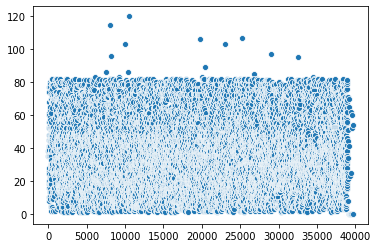

In [96]:
sns.scatterplot(data=loan_df.mths_since_last_delinq)
plt.show()

In [97]:
#As the plot shows a few outliers, it is better to replace the nan values by the median
print("Before Filling nans:",loan_df.mths_since_last_delinq.describe())
loan_df.mths_since_last_delinq.fillna(loan_df.mths_since_last_delinq.median(),inplace=True)
print("After Filling nans:",loan_df.mths_since_last_delinq.describe())

Before Filling nans: count    12501.000000
mean        37.105992
std         21.386464
min          0.000000
25%         20.000000
50%         35.000000
75%         53.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64
After Filling nans: count    36442.000000
mean        35.722436
std         12.565446
min          0.000000
25%         35.000000
50%         35.000000
75%         35.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64


In [98]:
#Finding the percentage of null values in each column
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2).sort_values(ascending=False).head()

pub_rec_bankruptcies    0.0
delinq_2yrs             0.0
addr_state              0.0
purpose                 0.0
loan_status             0.0
dtype: float64

## Data Formatting

In [99]:
loan_df.shape

(36442, 37)

In [100]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [101]:
loan_df.head()

,id,member_id,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,60 months,15.27%,59.83,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,35.0,3,0,1687,9.40%,4,0.00,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,36 months,13.49%,339.31,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,60 months,12.69%,67.79,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,36 months,7.90%,156.46,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,35.0,9,0,7963,28.30%,12,0.00,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,60 months,15.96%,170.08,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,35.0,7,0,17726,85.60%,11,0.00,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [102]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36442 entries, 1 to 39680
Data columns (total 37 columns):
id                         36442 non-null int64
member_id                  36442 non-null int64
loan_amnt                  36442 non-null int64
term                       36442 non-null object
int_rate                   36442 non-null object
installment                36442 non-null float64
sub_grade                  36442 non-null object
emp_title                  36442 non-null object
emp_length                 36442 non-null object
home_ownership             36442 non-null object
annual_inc                 36442 non-null float64
verification_status        36442 non-null object
issue_d                    36442 non-null object
loan_status                36442 non-null object
purpose                    36442 non-null object
addr_state                 36442 non-null object
dti                        36442 non-null float64
delinq_2yrs                36442 non-null int64
earliest_c

In [103]:
# COnverting columns 'int_rate','revol_util' to numeric
loan_df.int_rate=loan_df.int_rate.apply(lambda x:x.split('%')[0]).apply(pd.to_numeric)
loan_df.revol_util=loan_df.revol_util.apply(lambda x:x.split('%')[0]).apply(pd.to_numeric)


In [104]:
# Converting date columns to date format
datetime_columns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
print("Before Formatting:",loan_df[datetime_columns].info())
loan_df['issue_d']=pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['earliest_cr_line']=pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')
loan_df['last_pymnt_d']=pd.to_datetime(loan_df['last_pymnt_d'], format='%b-%y')
loan_df['last_credit_pull_d']=pd.to_datetime(loan_df['last_credit_pull_d'], format='%b-%y')
print("Before Formatting:",loan_df[datetime_columns].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36442 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36442 non-null object
earliest_cr_line      36442 non-null object
last_pymnt_d          36442 non-null object
last_credit_pull_d    36442 non-null object
dtypes: object(4)
memory usage: 1.4+ MB
Before Formatting: None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36442 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36442 non-null datetime64[ns]
earliest_cr_line      36442 non-null datetime64[ns]
last_pymnt_d          36442 non-null datetime64[ns]
last_credit_pull_d    36442 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB
Before Formatting: None


In [105]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36442 entries, 1 to 39680
Data columns (total 37 columns):
id                         36442 non-null int64
member_id                  36442 non-null int64
loan_amnt                  36442 non-null int64
term                       36442 non-null object
int_rate                   36442 non-null float64
installment                36442 non-null float64
sub_grade                  36442 non-null object
emp_title                  36442 non-null object
emp_length                 36442 non-null object
home_ownership             36442 non-null object
annual_inc                 36442 non-null float64
verification_status        36442 non-null object
issue_d                    36442 non-null datetime64[ns]
loan_status                36442 non-null object
purpose                    36442 non-null object
addr_state                 36442 non-null object
dti                        36442 non-null float64
delinq_2yrs                36442 non-null int64
e

In [106]:
loan_df.head()

,id,member_id,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,60 months,15.27,59.83,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,35.0,3,0,1687,9.4,4,0.00,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
3,1076863,1277178,10000,36 months,13.49,339.31,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,0.00,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,1311748,3000,60 months,12.69,67.79,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,1996-01-01,0,38.0,15,0,27783,53.9,38,524.06,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
5,1075269,1311441,5000,36 months,7.90,156.46,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,35.0,9,0,7963,28.3,12,0.00,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
6,1069639,1304742,7000,60 months,15.96,170.08,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,2005-07-01,1,35.0,7,0,17726,85.6,11,0.00,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


In [107]:
# Checking the precision of the float columns
loan_df.total_pymnt.value_counts().head()
loan_df.installment.value_counts().head()
float_columns = loan_df.columns[(loan_df.dtypes.values == np.dtype('float64'))]
for x in float_columns:
    loan_df[x]=round(loan_df[x],2)

In [108]:
# CHecking possible values of columns is in sync with the data dictionary
loan_df.term.value_counts()

 36 months    26383
 60 months    10059
Name: term, dtype: int64

In [109]:
loan_df.emp_length.value_counts()

10+ years    8408
2 years      4178
< 1 year     4053
3 years      3914
4 years      3299
5 years      3131
1 year       3027
6 years      2122
7 years      1697
8 years      1405
9 years      1208
Name: emp_length, dtype: int64

In [110]:
# As it is mentioned in the data dictionary that the possible values for 'emp_length' column is 0-10, formatting is done accordingly
loan_df.emp_length=loan_df.emp_length.apply(lambda x:str(x).replace('10+','10'))
loan_df.emp_length=loan_df.emp_length.apply(lambda x:str(x).replace('< 1','0'))
loan_df.emp_length=loan_df.emp_length.apply(lambda x:str(x).split()[0]).apply(pd.to_numeric)
loan_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36442 entries, 1 to 39680
Data columns (total 37 columns):
id                         36442 non-null int64
member_id                  36442 non-null int64
loan_amnt                  36442 non-null int64
term                       36442 non-null object
int_rate                   36442 non-null float64
installment                36442 non-null float64
sub_grade                  36442 non-null object
emp_title                  36442 non-null object
emp_length                 36442 non-null int64
home_ownership             36442 non-null object
annual_inc                 36442 non-null float64
verification_status        36442 non-null object
issue_d                    36442 non-null datetime64[ns]
loan_status                36442 non-null object
purpose                    36442 non-null object
addr_state                 36442 non-null object
dti                        36442 non-null float64
delinq_2yrs                36442 non-null int64
ea

In [111]:
loan_df.home_ownership.value_counts()

RENT        17468
MORTGAGE    16302
OWN          2578
OTHER          94
Name: home_ownership, dtype: int64

In [112]:
#Checking the permissible values in date time columns
datetime_columns

['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [113]:
loan_df.issue_d.dt.year.value_counts()

2011    20156
2010    10803
2009     4424
2008     1053
2007        6
Name: issue_d, dtype: int64

In [114]:
loan_df.earliest_cr_line.dt.year.value_counts()

2000    3035
1999    2763
1998    2647
2001    2363
1997    2271
1996    2074
1995    1975
1994    1861
2002    1795
2003    1740
2004    1639
2005    1406
1993    1398
2006    1080
1992     970
1990     945
1991     884
1989     781
1988     671
2007     669
1987     565
1986     447
1985     406
1984     360
1983     296
1982     196
1981     154
1980     150
2008     144
1979     141
1978     130
1977      90
1976      73
1975      57
1974      51
1973      41
1970      35
1971      34
1972      33
1969      22
2068      12
2067      12
2066       7
2065       6
2063       4
2062       3
2064       2
2046       1
2056       1
2054       1
2050       1
Name: earliest_cr_line, dtype: int64

In [115]:
# Removing rows with garbage values
print("Before dropping garbage values:",loan_df.shape)
loan_df=loan_df[pd.to_datetime(loan_df['earliest_cr_line']).dt.year<=2019]
print("Before dropping garbage values:",loan_df.shape)

Before dropping garbage values: (36442, 37)
Before dropping garbage values: (36392, 37)


In [116]:
loan_df.last_pymnt_d.dt.year.value_counts()

2013    8847
2014    8561
2012    8363
2011    4475
2015    2316
2016    1912
2010    1473
2009     404
2008      41
Name: last_pymnt_d, dtype: int64

In [117]:
loan_df.last_credit_pull_d.dt.year.value_counts()

2016    14345
2014     5710
2015     5140
2013     4763
2012     3739
2011     1899
2010      632
2009      145
2008       19
Name: last_credit_pull_d, dtype: int64

In [118]:
loan_df.to_csv('clean_loan_df.csv', encoding='utf-8', index=False)

## Univariate Analysis

In [119]:
loan_df.shape

(36392, 37)

In [120]:
loan_df.head()

,id,member_id,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,60 months,15.27,59.83,C4,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,35.0,3,0,1687,9.4,4,0.00,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
3,1076863,1277178,10000,36 months,13.49,339.31,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,0.00,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,1311748,3000,60 months,12.69,67.79,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,1996-01-01,0,38.0,15,0,27783,53.9,38,524.06,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
5,1075269,1311441,5000,36 months,7.90,156.46,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,35.0,9,0,7963,28.3,12,0.00,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
6,1069639,1304742,7000,60 months,15.96,170.08,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,2005-07-01,1,35.0,7,0,17726,85.6,11,0.00,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


### Analysis by Loan Amount

In [121]:
#Summary Metrics
loan_df.loan_amnt.describe()

count    36392.000000
mean     11304.501676
std       7432.223502
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

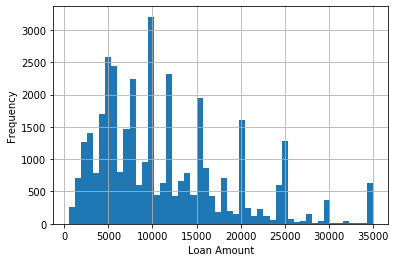

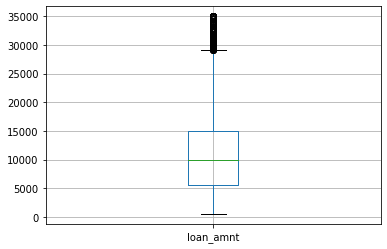

In [122]:
#Frequency PLot
loan_df['loan_amnt'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Loan Amount')
plt.show()
loan_df.boxplot(column='loan_amnt')

##### Note: The plots  confirm that the frequent loan_amount ranges between 5000-15000

  loan_amnt_bin     id
0          0-5k   8513
1         5-10k  11879
2        10-15k   7479
3        15-20k   4287
4        20-25k   2746
5        25-30k    734
6        30-35k    754


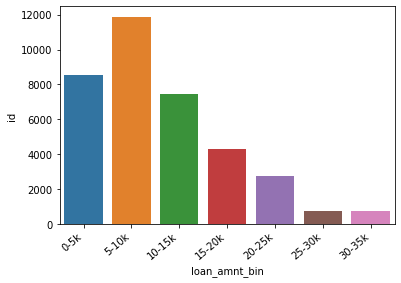

<Figure size 1800x720 with 0 Axes>

In [123]:
#Creating Derived categorical variable from the numeric data 'loan_amnt'
loan_df['loan_amnt_bin'] = pd.cut(loan_df['loan_amnt'],[x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])
loan_df_bingrp=loan_df.groupby('loan_amnt_bin',as_index=False).count()
print(loan_df_bingrp[['loan_amnt_bin','id']])
bp=sns.barplot(x='loan_amnt_bin', y='id', data=loan_df_bingrp);
bp.set_xticklabels(bp.get_xticklabels(),rotation=40,ha="right");
plt.figure(figsize=(25, 10))
plt.show()

##### Note: Most of the loans are in the range of 5000-10000

### Analysis by Loan Status

In [124]:
#Grouping by loan status and finding the percent of loans in each category
grp_loan_status=loan_df.groupby('loan_status',as_index=False).count()[['loan_status','id']].rename(columns={'id':'loans_count'})
grp_loan_status['percent']=round(grp_loan_status.loans_count.apply(lambda x:x*100/len(loan_df)))
grp_loan_status

,loan_status,loans_count,percent
0,Charged Off,4935,14.0
1,Current,1065,3.0
2,Fully Paid,30392,84.0


<function matplotlib.pyplot.show(*args, **kw)>

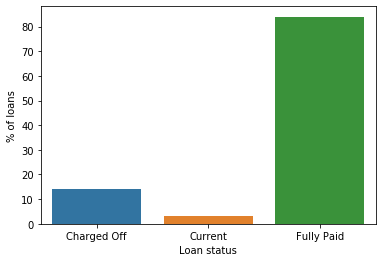

In [125]:
# PLotting the loan status - loan counts data
sns.barplot(x='loan_status',y='percent',data=grp_loan_status)
plt.xlabel('Loan status')
plt.ylabel('% of loans')
plt.show

##### Note:  14% of the loans get charged off

### Analysis By Total Payment Amount 

In [126]:
#Summary Metrics
print(loan_df.total_pymnt.describe())
# Finding Profit /Loss
loan_df['profit']=(loan_df.total_pymnt-loan_df.loan_amnt)
temp_df=loan_df.groupby('loan_status',as_index=False)[['loan_status','loan_amnt','profit']].sum()
temp_df['profit/loss %']=round(temp_df.profit*100/temp_df.loan_amnt)
temp_df

count    36392.000000
mean     12306.955040
std       9044.730952
min         33.730000
25%       5669.775000
50%      10095.660000
75%      16693.115000
max      58563.680000
Name: total_pymnt, dtype: float64


,loan_status,loan_amnt,profit,profit/loss %
0,Charged Off,60616625,-26006425.20,-43.0
1,Current,18211350,5164149.16,28.0
2,Fully Paid,332565450,57323558.84,17.0


##### Note: Current Profit Percentage of fully paid loans:17%

### Analysis by Purpose

               purpose  loans_count
2   debt_consolidation        17456
1          credit_card         4719
9                other         3575
4     home_improvement         2697
6       major_purchase         2004
0                  car         1440
11      small_business         1411
13             wedding          886
7              medical          633
8               moving          529
5                house          343
12            vacation          334
3          educational          278
10    renewable_energy           87


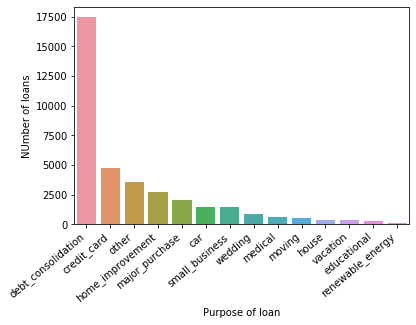

In [127]:
# Grouping data by purpose
grp_purp=loan_df.groupby('purpose',as_index=False).count()[['purpose','id']].rename(columns={'id':'loans_count'})
plot_purp=grp_purp.sort_values(by='loans_count',ascending=False)
print(plot_purp)
# PLotting the grouped data
bp=sns.barplot(x='purpose',y='loans_count',data=plot_purp)
bp.set_xticklabels(bp.get_xticklabels(),rotation=40,ha="right");
plt.xlabel('Purpose of loan')
plt.ylabel('NUmber of loans')
plt.show()

##### Note: Most frequent purpose of loans : Debt consolidation , credit card

### Analysis By State

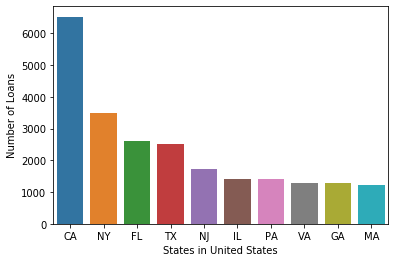

In [128]:
# Grouping by states
grp_states=loan_df.groupby('addr_state',as_index=False).count()[['addr_state','id']].rename(columns={'id':'loans_count'})
plot_states=grp_states.sort_values(by='loans_count',ascending=False).head(10)
# PLotting the top 10 states 
sns.barplot(x='addr_state',y='loans_count',data=plot_states)
plt.xlabel('States in United States')
plt.ylabel('Number of Loans')
plt.show()

In [129]:
# Using Beautiful Soup to extract state codes of United States
source_code = requests.get('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')
soup = BeautifulSoup(source_code.content,features="lxml")
table1 = soup.find_all('table')[0]
df = pd.read_html(str(table1))[0]
dict_df_states=df['Name &postal abbreviation[12]'].set_index('Name &postal abbreviation[12].1')
dict_df_states=dict_df_states.to_dict()
dict_df_states['Name &postal abbreviation[12]']['DC']='District of Columbia'
dict_df_states['Name &postal abbreviation[12]']

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky[E]',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts[E]',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania[E]',
 'RI': 'Rhode Island[F]',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia[E]',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming',
 'DC': 'Distr

In [130]:
# Extracting top 10 states with most loans
top10_states=[dict_df_states['Name &postal abbreviation[12]'][x] for x in plot_states.addr_state]
print("States with most loans:",top10_states)

States with most loans: ['California', 'New York', 'Florida', 'Texas', 'New Jersey', 'Illinois', 'Pennsylvania[E]', 'Virginia[E]', 'Georgia', 'Massachusetts[E]']


### Analysis By Interest Rate

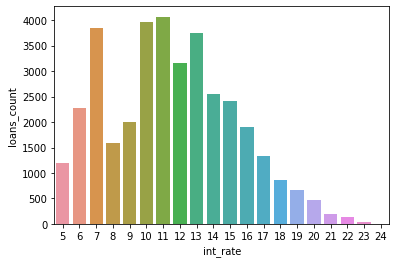

In [131]:
loan_df.int_rate=loan_df.int_rate.apply(np.int64)
int_rate_grp=loan_df.groupby('int_rate',as_index=False).count()[['int_rate','id']].rename(columns={'id':'loans_count'})
sns.barplot(x='int_rate',y='loans_count',data=int_rate_grp)
plt.show()

##### Note : More loans fall under the interest rates of 10-13%. Lesser loans fall under high interest category

##  Segmented Univariate Analysis : Relationship between charged off loans and various variables individually

### Variable : Interest Rate

In [132]:
loan_df_charged_off=loan_df[loan_df.loan_status=='Charged Off']
loan_df_charged_off.int_rate.describe()

count    4935.000000
mean       13.371023
std         3.696361
min         5.000000
25%        11.000000
50%        13.000000
75%        16.000000
max        24.000000
Name: int_rate, dtype: float64

    int_rate  charged_off_loans  total_loans  percent
19        24                  2            4     50.0
16        22                 50          128     39.0
15        21                 70          189     37.0
18        23                 13           41     32.0
12        20                136          460     30.0
10        19                190          671     28.0
7         17                326         1329     25.0
9         18                211          857     25.0
4         16                437         1909     23.0
2         15                467         2409     19.0
5         14                419         2544     16.0
0         13                554         3746     15.0
3         12                450         3161     14.0
1         11                534         4067     13.0
6         10                418         3957     11.0
11         9                164         2006      8.0
13         8                131         1585      8.0
8          7                

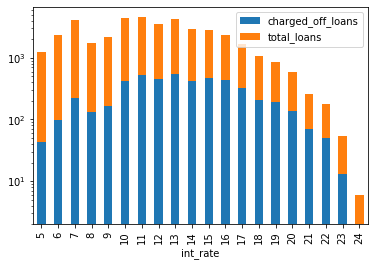

<Figure size 720x360 with 0 Axes>

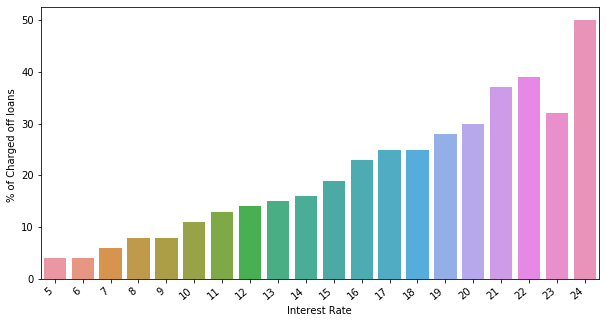

In [133]:
# Grouping charged off loans based on interest rate
loan_df_charged_off.int_rate=loan_df_charged_off.int_rate.apply(np.int64)
grp_int_rate=loan_df_charged_off.groupby('int_rate',as_index=False).count().sort_values(by='id',ascending=False)[['int_rate','id']].rename(columns={'id':'charged_off_loans'})
tgrp_int_rate=loan_df.groupby('int_rate',as_index=False).count().sort_values(by='id',ascending=False)[['int_rate','id']].rename(columns={'id':'total_loans'})
plot_int_rate=pd.merge(grp_int_rate,tgrp_int_rate,how='inner',on='int_rate')
plot_int_rate['percent']=round(plot_int_rate.charged_off_loans*100/plot_int_rate.total_loans)
plot_int_rate.percent=plot_int_rate.percent.apply(lambda x:100.0 if x>100.0 else x)
print(plot_int_rate.sort_values(by='percent',ascending=False))
# PLotting the grouped data
plot_int_rate[['int_rate','charged_off_loans','total_loans']].set_index('int_rate').sort_values(by='int_rate').plot(kind='bar',stacked=True)
plt.yscale('log')
plt.figure(figsize=(10, 5))
plt.show()
plt.figure(figsize=(10, 5))
bp=sns.barplot(x='int_rate',y='percent',data=plot_int_rate)
bp.set_xticklabels(bp.get_xticklabels(),rotation=40,ha="right");
plt.xlabel('Interest Rate')
plt.ylabel('% of Charged off loans ')
plt.show()

##### Note: More number of loans are granted in the mid interest ranges. As interest rates increases, the tendency to default increases

### Variable : Term

         term  charged_off_loans  total_loans  percent
0   36 months               2727        26348     10.0
1   60 months               2208        10044     22.0


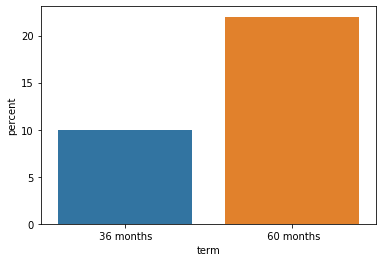

In [134]:
grp_df_term=loan_df_charged_off.groupby('term',as_index=False).count()[['term','id']].rename(columns={'id':'charged_off_loans'})
tgrp_df_term = loan_df.groupby('term',as_index=False).count()[['term','id']].rename(columns={'id':'total_loans'})
plot_term=pd.merge(grp_df_term,tgrp_df_term,how='inner',on='term')
plot_term['percent']=round(plot_term.charged_off_loans*100/plot_term.total_loans)
print(plot_term)
#Plotting the rate of each term
sns.barplot(x='term',y='percent',data=plot_term)
plt.show()

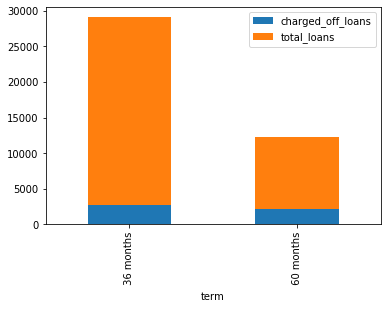

In [135]:
#Plot showing the total number of loans and charged off loans in the respective terms
plot_term[['term','charged_off_loans','total_loans']].set_index('term').plot(kind='bar',stacked=True)

##### Note: Tendency to default is more in the 60 months term

### Variable: Verification Status

  verification_status  charged_off_loans  total_loans  percent
0        Not Verified               1768        15041     12.0
1     Source Verified               1320         9440     14.0
2            Verified               1847        11911     16.0


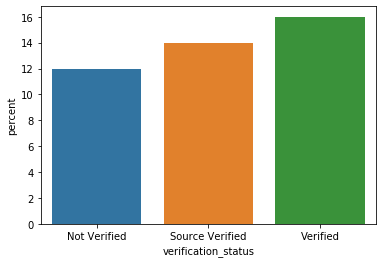

In [136]:
# Grouping charged off loans by the verification status
grp_verif_status=loan_df_charged_off.groupby('verification_status',as_index=False).count()[['verification_status','id']].rename(columns={'id':'charged_off_loans'})
tgrp_verif_status=loan_df.groupby('verification_status',as_index=False).count()[['verification_status','id']].rename(columns={'id':'total_loans'})
plot_verif_status=pd.merge(grp_verif_status,tgrp_verif_status,how='inner',on='verification_status')
plot_verif_status['percent']=round(plot_verif_status.charged_off_loans*100/plot_verif_status.total_loans)
print(plot_verif_status)
# Plotting the rate of default
sns.barplot(x='verification_status',y='percent',data=plot_verif_status)
plt.show()

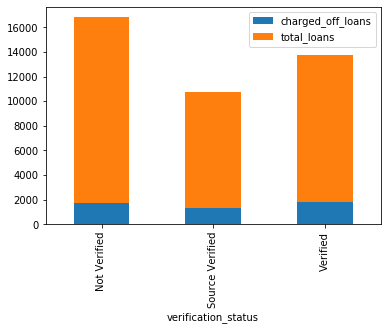

In [137]:
# PLotting the total loans and charged off loans based on verification status
plot_verif_status[['verification_status','charged_off_loans','total_loans']].set_index('verification_status').plot(kind='bar',stacked=True)

##### Note: Strangely, verified loans tend to get charged off more than non verified loans

### Variable : Grades & subgrades

  grade  charged_off_loans  total_loans  percent
0     A                512         9163      6.0
1     B               1250        11022     11.0
2     C               1167         7421     16.0
3     D                978         4872     20.0
4     E                649         2647     25.0
5     F                286          969     30.0
6     G                 93          298     31.0


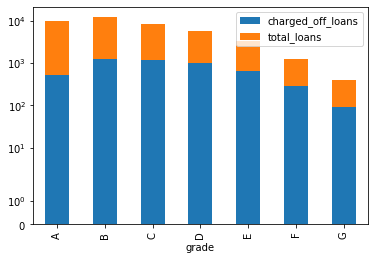

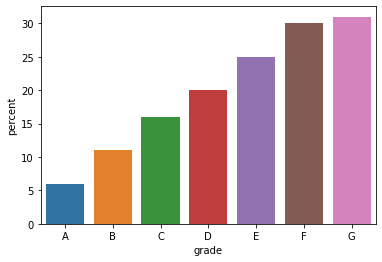

In [138]:
# Grouping by Grades
loan_df_charged_off['grade']=loan_df_charged_off['sub_grade'].apply(lambda x:x[0])
loan_df['grade']=loan_df['sub_grade'].apply(lambda x:x[0])
grp_loan_grade=loan_df_charged_off.groupby('grade',as_index=False).count()[['grade','id']].rename(columns={'id':'charged_off_loans'})
tgrp_loan_grade=loan_df.groupby('grade',as_index=False).count()[['grade','id']].rename(columns={'id':'total_loans'})
grade_plot=pd.merge(grp_loan_grade,tgrp_loan_grade,how='inner',on='grade')
grade_plot['percent']=round(grade_plot.charged_off_loans*100/grade_plot.total_loans)
grade_plot=grade_plot.sort_values(by='grade')
print(grade_plot)
# PLotting default rate wrt grades
grade_plot[['grade','charged_off_loans','total_loans']].set_index('grade').plot(kind='bar',stacked=True)
plt.yscale('symlog')
plt.show()
sns.barplot(x='grade',y='percent',data=grade_plot)
plt.show()

##### Note :Number of loans are more for higher grades. Lower grades tend to default more.. As grade increases, tendency to default decreases

### Variable : Purpose

In [139]:
# Grouping by the purpose and counting the number of default loans
loan_df_grp_purpose=loan_df.groupby('purpose',as_index=False).count()[['purpose','id']].sort_values(by='id',ascending=False)
loan_df_grp_purpose=loan_df_grp_purpose.rename(columns={'id':'total_loans'})
loan_df_charged_off_grp_purpose=loan_df_charged_off.groupby('purpose',as_index=False).count()[['purpose','id']].sort_values(by='id',ascending=False)
loan_df_charged_off_grp_purpose=loan_df_charged_off_grp_purpose.rename(columns={'id':'charged_off_loans'})
purpose_plot=pd.merge(loan_df_charged_off_grp_purpose,loan_df_grp_purpose,how='inner',on='purpose')
purpose_plot['percent']=round(purpose_plot.charged_off_loans*100/purpose_plot.total_loans,2)
purpose_plot=purpose_plot.sort_values(by='percent',ascending=False)
print(purpose_plot)

               purpose  charged_off_loans  total_loans  percent
3       small_business                355         1411    25.16
13    renewable_energy                 15           87    17.24
12         educational                 45          278    16.19
1                other                546         3575    15.27
10               house                 52          343    15.16
7              medical                 95          633    15.01
9               moving                 79          529    14.93
11            vacation                 49          334    14.67
0   debt_consolidation               2506        17456    14.36
4     home_improvement                294         2697    10.90
6                  car                148         1440    10.28
2          credit_card                478         4719    10.13
5       major_purchase                190         2004     9.48
8              wedding                 83          886     9.37


<Figure size 1440x720 with 0 Axes>

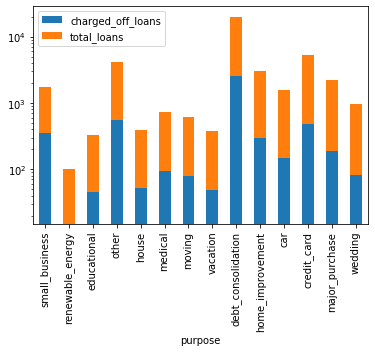

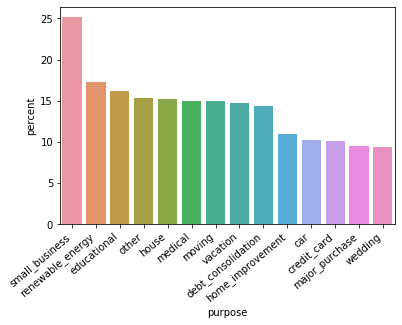

In [140]:
# Plotting data wrt purpose
plt.figure(figsize=(20, 10));
purpose_plot[['purpose','charged_off_loans','total_loans']].set_index('purpose').plot(kind='bar',stacked=True)
plt.yscale('log')
plt.show()
bp=sns.barplot(x='purpose',y='percent',data=purpose_plot)
bp.set_xticklabels(bp.get_xticklabels(),rotation=40,ha="right");
plt.show()

##### Note: Most loans for the purpose of small business, renewable energy , education, house loans tend to default more


### Variable: Issue Year and Month

In [141]:
loan_df_charged_off['issue_year']=loan_df_charged_off.issue_d.dt.year
loan_df_charged_off['issue_month']=loan_df_charged_off.issue_d.dt.month
grp_issue_year=loan_df_charged_off.groupby('issue_year',as_index=False).count()[['issue_year','id']].rename(columns={'id':'charged_off_loans'})
grp_issue_month=loan_df_charged_off.groupby('issue_month',as_index=False).count()[['issue_month','id']].rename(columns={'id':'charged_off_loans'})
loan_df['issue_year']=loan_df.issue_d.dt.year
loan_df['issue_month']=loan_df.issue_d.dt.month
tgrp_issue_year=loan_df.groupby('issue_year',as_index=False).count()[['issue_year','id']].rename(columns={'id':'total_loans'})
tgrp_issue_month=loan_df.groupby('issue_month',as_index=False).count()[['issue_month','id']].rename(columns={'id':'total_loans'})
issue_year_plot=pd.merge(grp_issue_year,tgrp_issue_year,how='inner',on='issue_year')
issue_month_plot=pd.merge(grp_issue_month,tgrp_issue_month,how='inner',on='issue_month')
issue_year_plot['percent']=round(issue_year_plot.charged_off_loans*100/issue_year_plot.total_loans)
issue_month_plot['percent']=round(issue_month_plot.charged_off_loans*100/issue_month_plot.total_loans)
print(issue_year_plot.sort_values(by='percent',ascending=False))
print(issue_month_plot.sort_values(by='percent',ascending=False))
grp_issue_d=loan_df_charged_off.groupby(['issue_year','issue_month'],as_index=False).count()[['issue_year','issue_month','id']].rename(columns={'id':'charged_off_loans'})
tgrp_issue_d=loan_df.groupby(['issue_year','issue_month'],as_index=False).count()[['issue_year','issue_month','id']].rename(columns={'id':'total_loans'})
issue_d_plot=pd.merge(grp_issue_d,tgrp_issue_d,how='inner',on=['issue_year','issue_month'])
issue_d_plot['percent']=round(issue_d_plot.charged_off_loans*100/issue_d_plot.total_loans)
print(issue_d_plot.sort_values(by='percent',ascending=False))

   issue_year  charged_off_loans  total_loans  percent
0        2007                  2            6     33.0
1        2008                160         1053     15.0
4        2011               2927        20126     15.0
2        2009                540         4417     12.0
3        2010               1306        10790     12.0
    issue_month  charged_off_loans  total_loans  percent
4             5                421         2819     15.0
11           12                599         4027     15.0
5             6                430         3069     14.0
8             9                495         3416     14.0
9            10                508         3591     14.0
10           11                516         3819     14.0
3             4                341         2670     13.0
6             7                433         3228     13.0
7             8                428         3301     13.0
0             1                255         2044     12.0
2             3                289         

<Figure size 1440x720 with 0 Axes>

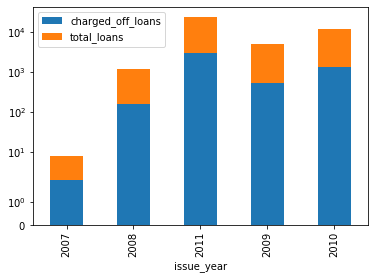

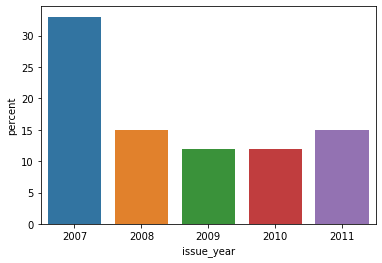

In [142]:
# Year plot
issue_year_plot=issue_year_plot.sort_values(by='percent',ascending=False)
plt.figure(figsize=(20, 10));
issue_year_plot[['issue_year','charged_off_loans','total_loans']].set_index('issue_year').plot(kind='bar',stacked=True)
plt.yscale('symlog')
plt.show()
sns.barplot(x='issue_year',y='percent',data=issue_year_plot)
plt.show()

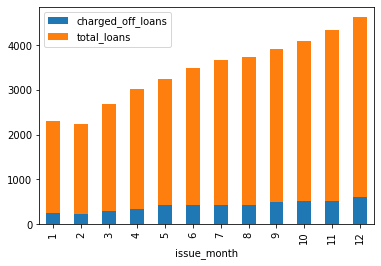

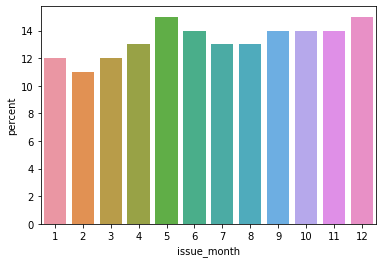

In [143]:
# Month PLot
issue_month_plot[['issue_month','charged_off_loans','total_loans']].set_index('issue_month').plot(kind='bar',stacked=True)
plt.show()
sns.barplot(x='issue_month',y='percent',data=issue_month_plot.sort_values(by='percent',ascending=False))
plt.show()

##### Note : Most number of loans were given in 2011 but, analysing the percentage of amount of loans get defaulted to the amount of loans granted, 2007 stands the first. This clearly indicated that more defaults occur during the economic crisis year [eg.2007-2008,2011]
##### More loans are granted in later part of the year. As month progresses, number of loans granted increases. This may be due to the year end rush. It is evident that as more loans are granted in later part of year, more defaults occur during the later part of year as well

### Variable : Employee Length

    emp_length  charged_off_loans  total_loans  percent
0            0                527         4047     13.0
1            1                409         3025     14.0
2            2                528         4173     13.0
3            3                521         3912     13.0
4            4                427         3294     13.0
5            5                421         3126     13.0
6            6                287         2118     14.0
7            7                248         1696     15.0
8            8                191         1404     14.0
9            9                147         1207     12.0
10          10               1229         8390     15.0


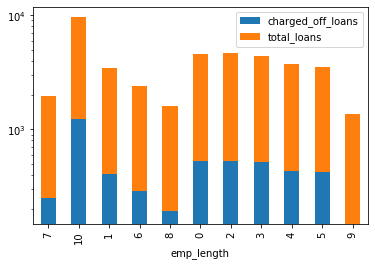

<Figure size 1440x720 with 0 Axes>

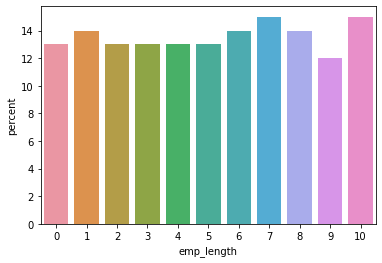

In [144]:
# Grouping data wrt experience
grp_emp_len=loan_df_charged_off.groupby('emp_length',as_index=False).count()[['emp_length','id']].rename(columns={'id':'charged_off_loans'})
tgrp_emp_len=loan_df.groupby('emp_length',as_index=False).count()[['emp_length','id']].rename(columns={'id':'total_loans'})
exp_plot=pd.merge(grp_emp_len,tgrp_emp_len,how='inner',on='emp_length')
exp_plot['percent']=round(exp_plot.charged_off_loans*100/exp_plot.total_loans)
print(exp_plot)
# Plotting default rate wrt experience
exp_plot=exp_plot.sort_values(by='percent',ascending=False)
exp_plot[['emp_length','charged_off_loans','total_loans']].set_index('emp_length').plot(kind='bar',stacked=True)
plt.yscale('log')
plt.figure(figsize=(20, 10));
plt.show()
sns.barplot(x='emp_length',y='percent',data=exp_plot)
plt.show()

##### Note: As emp_length increases, the tendency to default marginally increases

### Variable: Home Ownership

  home_ownership  charged_off_loans  total_loans  percent
0       MORTGAGE               2056        16276     13.0
1          OTHER                 18           93     19.0
2            OWN                344         2570     13.0
3           RENT               2517        17453     14.0


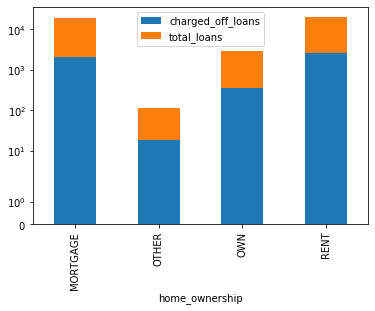

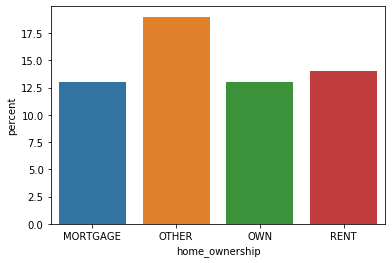

In [145]:
# Grouping data wrt owning a house
grp_home_owner=loan_df_charged_off.groupby('home_ownership',as_index=False).count()[['home_ownership','id']].rename(columns={'id':'charged_off_loans'})
tgrp_home_owner=loan_df.groupby('home_ownership',as_index=False).count()[['home_ownership','id']].rename(columns={'id':'total_loans'})
home_owner_plot=pd.merge(grp_home_owner,tgrp_home_owner,how='inner',on='home_ownership')
home_owner_plot['percent']=round(home_owner_plot.charged_off_loans*100/home_owner_plot.total_loans)
print(home_owner_plot)
# Plotting the grouped data
home_owner_plot[['home_ownership','charged_off_loans','total_loans']].set_index('home_ownership').plot(kind='bar',stacked=True)
plt.yscale('symlog')
plt.show()
sns.barplot(x='home_ownership',y='percent',data=home_owner_plot)
plt.show()

##### Note : Those falling under category 'others', default more.

### Variable : Public Record of Bankruptcies

   pub_rec_bankruptcies  charged_off_loans  total_loans  percent
2                   2.0                  2            7     29.0
1                   1.0                310         1488     21.0
0                   0.0               4623        34897     13.0


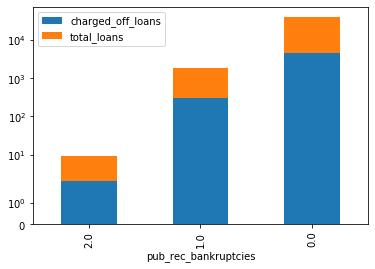

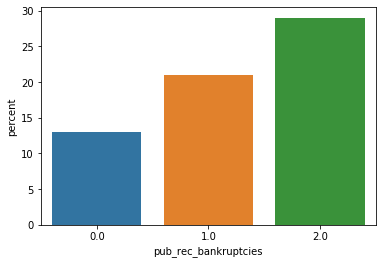

In [146]:
# Grouping wrt bankruptcy record
grp_bankrupt=loan_df_charged_off.groupby('pub_rec_bankruptcies',as_index=False).count()[['pub_rec_bankruptcies','id']].rename(columns={'id':'charged_off_loans'})
tgrp_bankrupt=loan_df.groupby('pub_rec_bankruptcies',as_index=False).count()[['pub_rec_bankruptcies','id']].rename(columns={'id':'total_loans'})
plt_bank=pd.merge(grp_bankrupt,tgrp_bankrupt,how='inner',on='pub_rec_bankruptcies')
plt_bank['percent']=round(plt_bank.charged_off_loans*100/plt_bank.total_loans)
plt_bank=plt_bank.sort_values(by='percent',ascending=False)
print(plt_bank)
# Plotting the grouped data
plt_bank[['pub_rec_bankruptcies','charged_off_loans','total_loans']].set_index('pub_rec_bankruptcies').plot(kind='bar',stacked=True)
plt.yscale('symlog')
plt.show()
sns.barplot(x='pub_rec_bankruptcies',y='percent',data=plt_bank)
plt.show()

##### Note: Very few loans are granted to those with previous bankruptcy record which is highly risky to get defaulted

### Variable : Loan_amount

  loan_amnt_bin  charged_off_loans  total_loans  percent
0          0-5k               1093         8513     13.0
1         5-10k               1443        11879     12.0
2        10-15k                943         7479     13.0
3        15-20k                685         4287     16.0
4        20-25k                478         2746     17.0
5        25-30k                133          734     18.0
6        30-35k                160          754     21.0


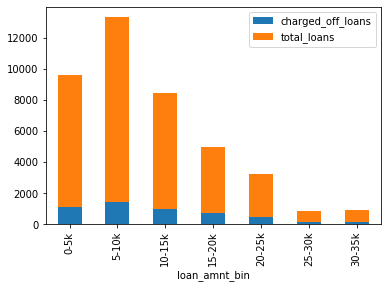

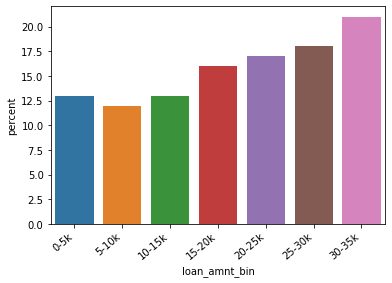

In [147]:
# Grouping based on loan amount range
grp_loan_amnt=loan_df_charged_off.groupby('loan_amnt_bin',as_index=False).count().rename(columns={'id':'charged_off_loans'})[['loan_amnt_bin','charged_off_loans']]
tgrp_loan_amnt=loan_df.groupby('loan_amnt_bin',as_index=False).count().rename(columns={'id':'total_loans'})[['loan_amnt_bin','total_loans']]
plot_loan_amnt=pd.merge(grp_loan_amnt,tgrp_loan_amnt,how='inner',on='loan_amnt_bin')
plot_loan_amnt['percent']=round(plot_loan_amnt.charged_off_loans*100/plot_loan_amnt.total_loans)
print(plot_loan_amnt)
# PLotting the grouped data
plot_loan_amnt[['loan_amnt_bin','charged_off_loans','total_loans']].set_index('loan_amnt_bin').plot(kind='bar',stacked=True)
#plt.yscale('symlog')
plt.show()
bp=sns.barplot(x='loan_amnt_bin', y='percent', data=plot_loan_amnt);
bp.set_xticklabels(bp.get_xticklabels(),rotation=40,ha="right");
plt.show()

##### Note: More number of loans are granted in the range of 5-10 k whereas the default rate increases as loan amount increases above 15k

### Variable : Income Amount

      annual_inc_bin  charged_off_loans  total_loans  percent
0         (0, 50000]               2228        14033     16.0
1    (50000, 100000]               2180        17156     13.0
2   (100000, 150000]                388         3838     10.0
3   (150000, 200000]                 90          859     10.0
4   (200000, 250000]                 23          242     10.0
5   (250000, 300000]                  8          112      7.0
6   (300000, 350000]                  5           49     10.0
7   (350000, 400000]                  3           25     12.0
9   (450000, 500000]                  1           10     10.0
10  (500000, 550000]                  2            8     25.0
11  (550000, 600000]                  1            6     17.0
13  (650000, 700000]                  2            3     67.0
14  (700000, 750000]                  1            7     14.0
15  (750000, 800000]                  1            8     12.0
16  (800000, 850000]                  1            2     50.0


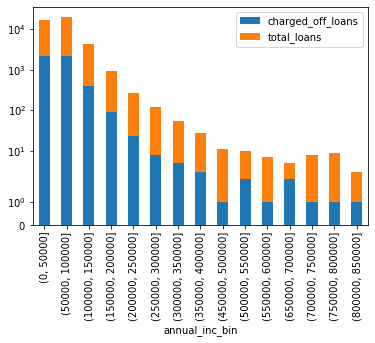

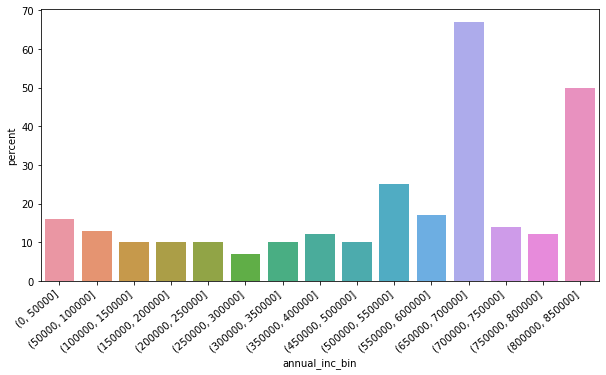

In [148]:
# Grouping wrt Income amount range
loan_df['annual_inc']=loan_df['annual_inc'].apply(np.int64)
loan_df['annual_inc_bin'] = pd.cut(loan_df['annual_inc'],[x for x in range(0, loan_df.annual_inc.max(), 50000)])
loan_df_charged_off['annual_inc']=loan_df_charged_off['annual_inc'].apply(np.int64)
loan_df_charged_off['annual_inc_bin'] = pd.cut(loan_df_charged_off['annual_inc'],[x for x in range(0, loan_df_charged_off.annual_inc.max(), 50000)])
grp_inc_bin=loan_df_charged_off.groupby('annual_inc_bin',as_index=False).count()[['annual_inc_bin','id']].rename(columns={'id':'charged_off_loans'})
tgrp_inc_bin=loan_df.groupby('annual_inc_bin',as_index=False).count()[['annual_inc_bin','id']].rename(columns={'id':'total_loans'})
grp_inc_bin.annual_inc_bin=grp_inc_bin.annual_inc_bin.astype(str)
tgrp_inc_bin.annual_inc_bin=tgrp_inc_bin.annual_inc_bin.astype(str)
inc_plot=pd.merge(grp_inc_bin,tgrp_inc_bin,how='inner',on='annual_inc_bin')
inc_plot['percent']=round(inc_plot.charged_off_loans*100/inc_plot.total_loans)
inc_plot=inc_plot[inc_plot.charged_off_loans.apply(lambda x:x!=0)]
print(inc_plot)
# PLotting grouped data
inc_plot[['annual_inc_bin','charged_off_loans','total_loans']].set_index('annual_inc_bin').plot(kind='bar',stacked=True)
plt.yscale('symlog')
plt.show()
plt.figure(figsize=(10, 5));
bp=sns.barplot(x='annual_inc_bin',y='percent',data=inc_plot)
bp.set_xticklabels(bp.get_xticklabels(),rotation=40,ha="right");
plt.show()

##### Note : Defaults are high with  high income groups - between 5-8.5 lakhs annual income

### Variable : DTI -- Debt to Income 

    dti_bin  charged_off_loans  total_loans  percent
4  (20, 25]               1000         6385     16.0
3  (15, 20]               1232         8417     15.0
2  (10, 15]               1258         9141     14.0
1   (5, 10]                848         7309     12.0
0    (0, 5]                496         4374     11.0


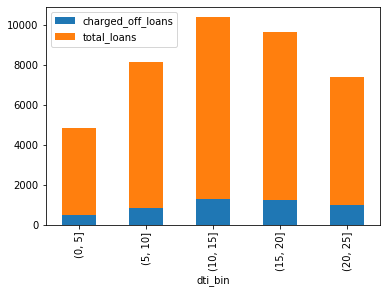

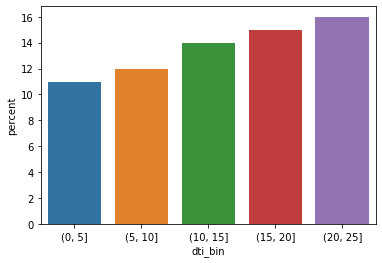

In [149]:
# Grouping data
loan_df['dti_bin'] = pd.cut(loan_df['dti'],[x for x in range(0, int(loan_df.dti.max()), 5)])
loan_df_charged_off['dti_bin'] = pd.cut(loan_df_charged_off['dti'],[x for x in range(0, int(loan_df.dti.max()), 5)])
grp_dti=loan_df_charged_off.groupby('dti_bin',as_index=False).count()[['dti_bin','id']].rename(columns={'id':'charged_off_loans'})
tgrp_dti=loan_df.groupby('dti_bin',as_index=False).count()[['dti_bin','id']].rename(columns={'id':'total_loans'})
dti_plot=pd.merge(grp_dti,tgrp_dti,how='inner',on='dti_bin')
dti_plot['percent']=round(dti_plot.charged_off_loans*100/dti_plot.total_loans)
print(dti_plot.sort_values(by='percent',ascending=False))
# PLotting data
dti_plot[['dti_bin','charged_off_loans','total_loans']].set_index('dti_bin').plot(kind='bar',stacked=True)
plt.show()
sns.barplot(x='dti_bin',y='percent',data=dti_plot)
plt.show()

##### Note : More number of loans are in the category of 10-15. As the dti increases, defaults increase

### Variable : NUmber of open accounts

    open_acc  charged_off_loans  total_loans  percent
32        38                  1            1    100.0
30        33                  2            3     67.0
29        31                  2            5     40.0
25        27                  5           20     25.0
28        30                  3           13     23.0
24        26                  6           29     21.0
23        25                 10           51     20.0
31        34                  1            5     20.0
0          2                 95          487     20.0
26        28                  4           23     17.0
1          3                210         1314     16.0
17        19                 56          369     15.0
9         11                346         2561     14.0
11        13                241         1763     14.0
12        14                195         1380     14.0
13        15                153         1099     14.0
2          4                300         2078     14.0
15        17                

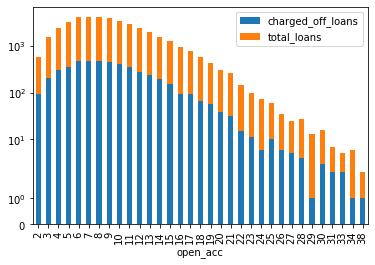

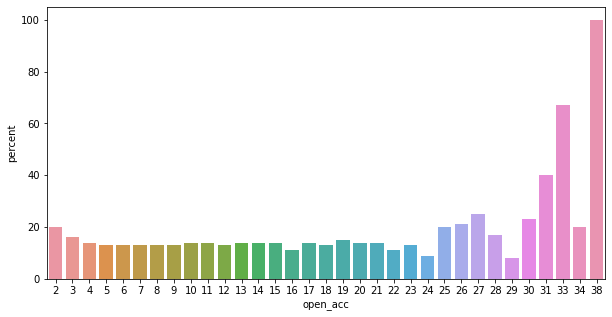

In [150]:
# Grouping data wrt number of open accounts
grp_open_acc=loan_df_charged_off.groupby('open_acc',as_index=False).count()[['open_acc','id']].rename(columns={'id':'charged_off_loans'})
tgrp_open_acc=loan_df.groupby('open_acc',as_index=False).count()[['open_acc','id']].rename(columns={'id':'total_loans'})
open_acc_plot=pd.merge(grp_open_acc,tgrp_open_acc,how='inner',on='open_acc')
open_acc_plot['percent']=round(open_acc_plot.charged_off_loans*100/open_acc_plot.total_loans)
print(open_acc_plot.sort_values(by='percent',ascending=False))
# Plotting grouped data
open_acc_plot.sort_values(by='open_acc')[['open_acc','charged_off_loans','total_loans']].set_index('open_acc').plot(kind='bar',stacked=True)
plt.yscale('symlog')
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x='open_acc',y='percent',data=open_acc_plot)
plt.show()

##### Note: More number of loans are granted for those with less than 10 open accounts.  The default rates shoot up when number of open credit accounts increase beyond 25. Lesser the value the better

### Variable : Number of months since last delinquished

   months_range  charged_off_loans  total_loans  percent
9     (90, 100]                  1            3     33.0
10   (100, 110]                  1            4     25.0
8      (80, 90]                 26          136     19.0
7      (70, 80]                167         1006     17.0
6      (60, 70]                162         1032     16.0
0       (0, 10]                208         1366     15.0
1      (10, 20]                284         1935     15.0
4      (40, 50]                257         1734     15.0
5      (50, 60]                176         1201     15.0
2      (20, 30]                285         2059     14.0
3      (30, 40]               3365        25905     13.0


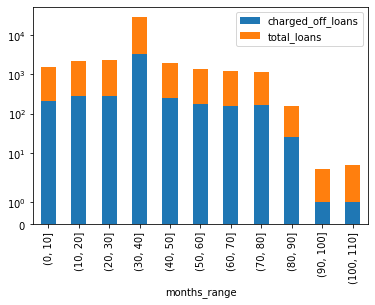

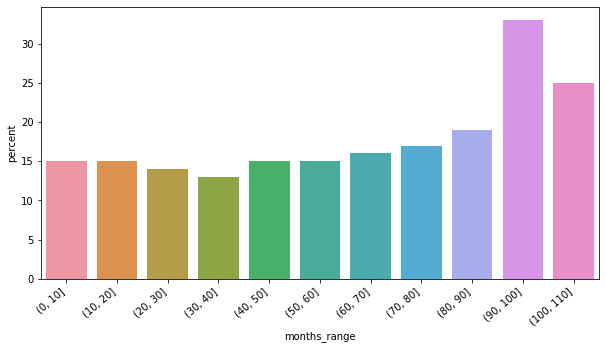

In [151]:
# Grouping based on months since last delinquished
loan_df['months_range']= pd.cut(loan_df['mths_since_last_delinq'],[x for x in range(0, int(loan_df.mths_since_last_delinq.max()), 10)])
loan_df_charged_off['months_range']= pd.cut(loan_df_charged_off['mths_since_last_delinq'],[x for x in range(0, int(loan_df.mths_since_last_delinq.max()), 10)])
grp_del_mnt=loan_df_charged_off.groupby('months_range',as_index=False).count()[['months_range','id']].rename(columns={'id':'charged_off_loans'})
tgrp_del_mnt=loan_df.groupby('months_range',as_index=False).count()[['months_range','id']].rename(columns={'id':'total_loans'})
plot_del_mnt=pd.merge(grp_del_mnt,tgrp_del_mnt,how='inner',on='months_range')
plot_del_mnt['percent']=round(plot_del_mnt.charged_off_loans*100/plot_del_mnt.total_loans)
print(plot_del_mnt.sort_values(by='percent',ascending=False))
# Plotting grouped data
plot_del_mnt.sort_values(by='months_range')[['months_range','charged_off_loans','total_loans']].set_index('months_range').plot(kind='bar',stacked=True)
plt.yscale('symlog')
plt.show()
plt.figure(figsize=(10,5))
bp=sns.barplot(x='months_range',y='percent',data=plot_del_mnt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=40,ha="right");
plt.show()

##### Note: The tendency to default increases when the previous delinquished period exceeds 5 years and lesser loans are granted during this period

### Variable : State

In [152]:
# Group by states
grp_state=loan_df_charged_off.groupby('addr_state',as_index=False).count()[['addr_state','id']].rename(columns={'id':'charged_off_loans'})
tgrp_state=loan_df.groupby('addr_state',as_index=False).count()[['addr_state','id']].rename(columns={'id':'total_loans'})
plot_state=pd.merge(grp_state,tgrp_state,how='inner',on='addr_state')
plot_state['percent']=round(plot_state.charged_off_loans*100/plot_state.total_loans)
print(plot_state.sort_values(by='percent',ascending=False).head(10))
print(plot_state.sort_values(by='percent',ascending=False).tail(10))
top10_states1=plot_state.sort_values(by='percent',ascending=False).head(10).addr_state

   addr_state  charged_off_loans  total_loans  percent
27         NV                 97          460     21.0
0          AK                 15           75     20.0
36         TN                  2           10     20.0
35         SD                 10           57     18.0
26         NM                 28          167     17.0
9          FL                436         2614     17.0
11         HI                 26          161     16.0
25         NJ                256         1722     15.0
20         MO                 95          624     15.0
4          CA                972         6524     15.0
   addr_state  charged_off_loans  total_loans  percent
16         MA                139         1221     11.0
15         LA                 45          398     11.0
37         TX                273         2515     11.0
5          CO                 80          705     11.0
2          AR                 25          225     11.0
13         KS                 24          249     10.0
8         

In [153]:
try:
    top10_states_list=[dict_df_states['Name &postal abbreviation[12]'][x] for x in top10_states1]
except KeyError:
    pass
print("States with most defaults:",top10_states_list)
print("States with most loans",top10_states)

States with most defaults: ['Nevada', 'Alaska', 'Tennessee', 'South Dakota', 'New Mexico', 'Florida', 'Hawaii', 'New Jersey', 'Missouri', 'California']
States with most loans ['California', 'New York', 'Florida', 'Texas', 'New Jersey', 'Illinois', 'Pennsylvania[E]', 'Virginia[E]', 'Georgia', 'Massachusetts[E]']


##### Note: California, Florida tops the list both in getting loans and also default rates

### Variable : Revolving Untility Rate

  revol_util_bin  charged_off_loans  total_loans  percent
8       (80, 90]                595         3397     18.0
7       (70, 80]                632         3702     17.0
6       (60, 70]                601         4016     15.0
4       (40, 50]                544         3974     14.0
5       (50, 60]                567         4033     14.0
3       (30, 40]                431         3767     11.0
2       (20, 30]                373         3580     10.0
1       (10, 20]                281         3071      9.0
0        (0, 10]                224         2985      8.0


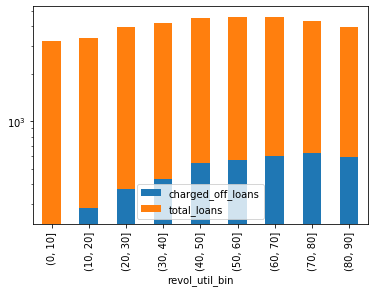

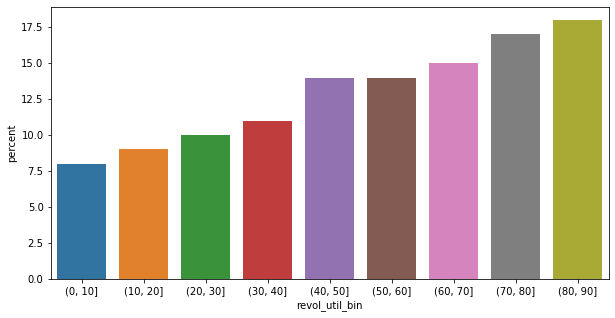

In [154]:
# Grouping data wrt number of open accounts
loan_df.revol_util=loan_df.revol_util.apply(np.int64)
loan_df_charged_off.revol_util=loan_df.revol_util.apply(np.int64)
loan_df['revol_util_bin']= pd.cut(loan_df['revol_util'],[x for x in range(0, int(loan_df.revol_util.max()), 10)])
loan_df_charged_off['revol_util_bin']= pd.cut(loan_df_charged_off['revol_util'],[x for x in range(0, int(loan_df.revol_util.max()), 10)])
grp_rev=loan_df_charged_off.groupby('revol_util_bin',as_index=False).count()[['revol_util_bin','id']].rename(columns={'id':'charged_off_loans'})
tgrp_rev=loan_df.groupby('revol_util_bin',as_index=False).count()[['revol_util_bin','id']].rename(columns={'id':'total_loans'})
rev_plot=pd.merge(grp_rev,tgrp_rev,how='inner',on='revol_util_bin')
rev_plot['percent']=round(rev_plot.charged_off_loans*100/rev_plot.total_loans)
print(rev_plot.sort_values(by='percent',ascending=False))
# Plotting grouped data
rev_plot.sort_values(by='revol_util_bin')[['revol_util_bin','charged_off_loans','total_loans']].set_index('revol_util_bin').plot(kind='bar',stacked=True)
plt.yscale('log')
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x='revol_util_bin',y='percent',data=rev_plot)
plt.show()

##### Note: As revolving untility rate increases, default risk increases

## Bivariate Analysis. Relationship between 2 variables and loan_status

### Variables: Term & Purpose

<Figure size 1440x720 with 0 Axes>

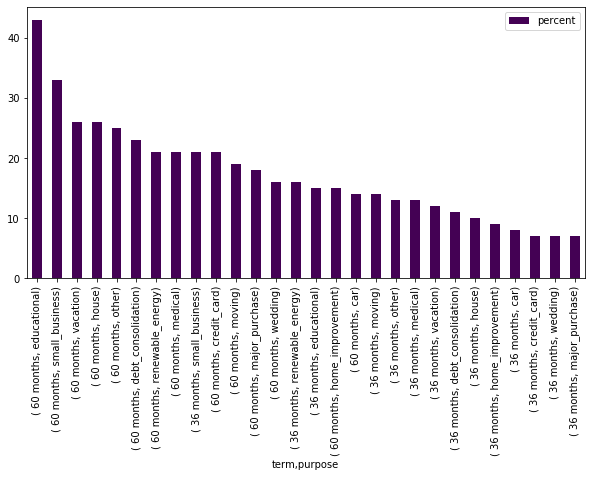

In [155]:
#Grouping wrt term and purpose
grp_term_purp=loan_df_charged_off.groupby(['term','purpose'],as_index=False).count()[['term','purpose','id']].rename(columns={'id':'charged_off_loans'})
tgrp_term_purp=loan_df.groupby(['term','purpose'],as_index=False).count()[['term','purpose','id']].rename(columns={'id':'total_loans'})
term_purpose_plot=pd.merge(grp_term_purp,tgrp_term_purp,how='inner',on=['term','purpose'])
term_purpose_plot['percent']=round(term_purpose_plot.charged_off_loans*100/term_purpose_plot.total_loans)
term_purpose_plot.sort_values(by='percent',ascending=False)
# Plot the grouped data
plt.figure(figsize=(20,10))
term_purpose_plot[['term','purpose','percent']].set_index(['term','purpose']).sort_values(by='percent',ascending=False).plot(kind='bar',figsize=(10,5),colormap='viridis')
plt.show()

##### Note: Bivariate Analysis on term and purpose confirms that term of 60 months default more irrespective of purpose. Purposes like Small business, renewable energy, educational loans default more irrespective of terms

### Variables : Term and loan_amount

          term loan_amnt_bin  charged_off_loans  total_loans  percent
13   60 months        30-35k                145          583     25.0
10   60 months        15-20k                453         1996     23.0
11   60 months        20-25k                323         1408     23.0
7    60 months          0-5k                230         1027     22.0
8    60 months         5-10k                451         2047     22.0
12   60 months        25-30k                116          544     21.0
9    60 months        10-15k                490         2439     20.0
0    36 months          0-5k                863         7486     12.0
4    36 months        20-25k                155         1338     12.0
1    36 months         5-10k                992         9832     10.0
3    36 months        15-20k                232         2291     10.0
2    36 months        10-15k                453         5040      9.0
5    36 months        25-30k                 17          190      9.0
6    36 months      

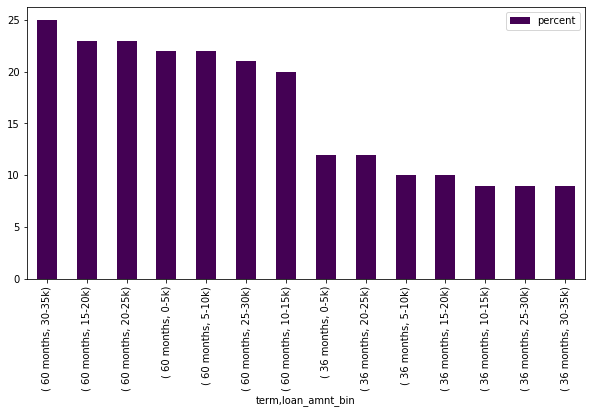

In [156]:
# Grouping wrt Term and loan amount range
grp_term_amt=loan_df_charged_off.groupby(['term','loan_amnt_bin'],as_index=False).count()[['term','loan_amnt_bin','id']].rename(columns={'id':'charged_off_loans'})
tgrp_term_amt=loan_df.groupby(['term','loan_amnt_bin'],as_index=False).count()[['term','loan_amnt_bin','id']].rename(columns={'id':'total_loans'})
term_amt_plot=pd.merge(grp_term_amt,tgrp_term_amt,how='inner',on=['term','loan_amnt_bin'])
term_amt_plot['percent']=round(term_amt_plot.charged_off_loans*100/term_amt_plot.total_loans)
term_amt_plot=term_amt_plot.sort_values(by='percent',ascending=False)
print(term_amt_plot)
# Plotting the grouped data
term_amt_plot[['term','loan_amnt_bin','percent']].set_index(['term','loan_amnt_bin']).plot(kind='bar',figsize=(10,5),colormap='viridis')

##### Note: 60 months term default more irrespective of loan amount range compared to 36 months term. In 60 months term, higher bins tend to default more whereas in 36 months term, lower bins tend to default more

### Variables : Home ownership and purpose

   home_ownership             purpose  charged_off_loans  total_loans  percent
18          OTHER              moving                  1            1    100.0
14          OTHER                 car                  1            2     50.0
20          OTHER      small_business                  4           10     40.0
46           RENT      small_business                175          614     29.0
45           RENT    renewable_energy                  8           31     26.0
32            OWN      small_business                 19           75     25.0
11       MORTGAGE      small_business                157          712     22.0
15          OTHER         credit_card                  2           10     20.0
17          OTHER    home_improvement                  1            5     20.0
29            OWN              moving                  5           26     19.0
47           RENT            vacation                 34          188     18.0
16          OTHER  debt_consolidation               

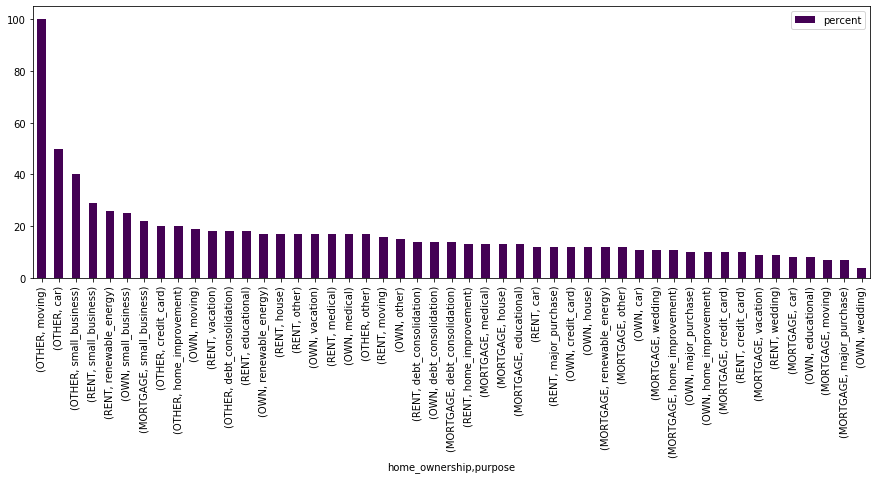

In [157]:
# Grouping data wrt home ownership and purpose
grp_own_purp=loan_df_charged_off.groupby(['home_ownership','purpose'],as_index=False).count()[['home_ownership','purpose','id']].rename(columns={'id':'charged_off_loans'})
tgrp_own_purp=loan_df.groupby(['home_ownership','purpose'],as_index=False).count()[['home_ownership','purpose','id']].rename(columns={'id':'total_loans'})
purp_own_plot=pd.merge(grp_own_purp,tgrp_own_purp,how='inner',on=['home_ownership','purpose'])
purp_own_plot['percent']=round(purp_own_plot.charged_off_loans*100/purp_own_plot.total_loans)
purp_own_plot=purp_own_plot.sort_values(by='percent',ascending=False)
print(purp_own_plot)
# Plotting the grouped value
purp_own_plot[['home_ownership','purpose','percent']].set_index(['home_ownership','purpose']).plot(kind='bar',figsize=(15,5),colormap='viridis')

##### Note: Loans obtained for small business default more irrespective of house ownership. Loans obtained for wedding default less irrespective of house ownership

### Variables : Purpose and loan amount

             purpose loan_amnt_bin  charged_off_loans  total_loans  percent
61            moving        25-30k                1.0          2.0     50.0
55           medical        30-35k                2.0          4.0     50.0
25       educational        20-25k                3.0          8.0     38.0
83    small_business        30-35k               25.0         65.0     38.0
74  renewable_energy        20-25k                2.0          6.0     33.0
87          vacation        15-20k                4.0         12.0     33.0
54           medical        25-30k                1.0          3.0     33.0
4                car        20-25k                4.0         13.0     31.0
82    small_business        25-30k               15.0         50.0     30.0
80    small_business        15-20k               50.0        171.0     29.0
97           wedding        30-35k                2.0          7.0     29.0
79    small_business        10-15k               84.0        295.0     28.0
24       edu

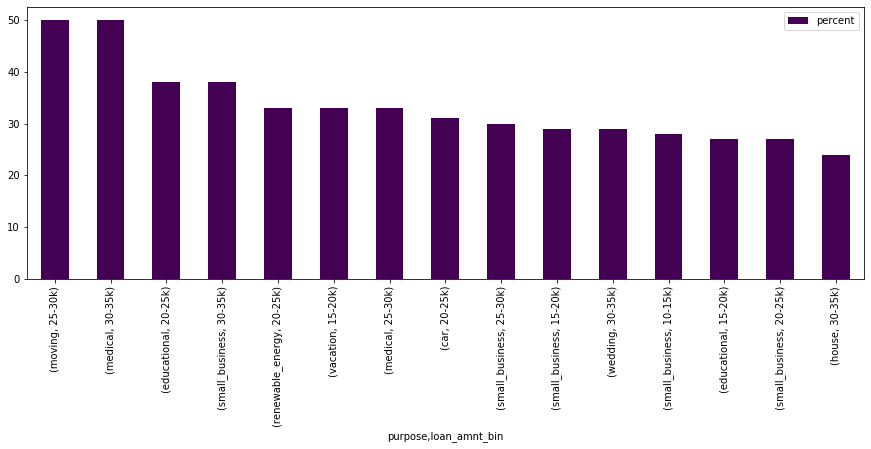

In [158]:
# Grouping wrt purpose and loan amount range
grp_purp_amt=loan_df_charged_off.groupby(['purpose','loan_amnt_bin'],as_index=False).count()[['purpose','loan_amnt_bin','id']].rename(columns={'id':'charged_off_loans'})
tgrp_purp_amt=loan_df.groupby(['purpose','loan_amnt_bin'],as_index=False).count()[['purpose','loan_amnt_bin','id']].rename(columns={'id':'total_loans'})
purp_amt_plot=pd.merge(grp_purp_amt,tgrp_purp_amt,how='inner',on=['purpose','loan_amnt_bin'])
purp_amt_plot['percent']=round(purp_amt_plot.charged_off_loans*100/purp_amt_plot.total_loans)
purp_amt_plot=purp_amt_plot.sort_values(by='percent',ascending=False).dropna().head(15)
print(purp_amt_plot)
# PLotting the grouped data
purp_amt_plot[['purpose','loan_amnt_bin','percent']].set_index(['purpose','loan_amnt_bin']).plot(kind='bar',figsize=(15,5),colormap='viridis')

##### Note:Higher bins default more. Higher bins for purposes like Moving, Medical, educational, small business, renewable energy tend to default more

### Variables: Term and home ownership

  home_ownership        term  charged_off_loans  total_loans  percent
3          OTHER   60 months                  1            1    100.0
7           RENT   60 months                996         4022     25.0
5            OWN   60 months                161          671     24.0
1       MORTGAGE   60 months               1050         5350     20.0
2          OTHER   36 months                 17           92     18.0
6           RENT   36 months               1521        13431     11.0
4            OWN   36 months                183         1899     10.0
0       MORTGAGE   36 months               1006        10926      9.0


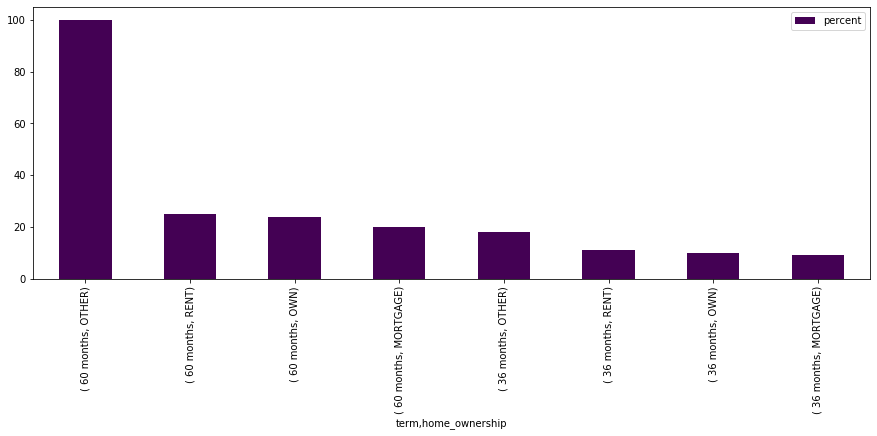

In [159]:
# Grouping wrt term and home ownership
grp_own_term=loan_df_charged_off.groupby(['home_ownership','term'],as_index=False).count()[['home_ownership','term','id']].rename(columns={'id':'charged_off_loans'})
tgrp_own_term=loan_df.groupby(['home_ownership','term'],as_index=False).count()[['home_ownership','term','id']].rename(columns={'id':'total_loans'})
term_own_plot=pd.merge(grp_own_term,tgrp_own_term,how='inner',on=['home_ownership','term'])
term_own_plot['percent']=round(term_own_plot.charged_off_loans*100/term_own_plot.total_loans)
term_own_plot=term_own_plot.sort_values(by='percent',ascending=False)
print(term_own_plot)
# Plotting grouped data
term_own_plot[['term','home_ownership','percent']].set_index(['term','home_ownership']).plot(kind='bar',figsize=(15,5),colormap='viridis')

##### Note: 60 months term default more irrespective of home ownership. Also, there is no significant difference in the default tendency among different categories of home ownership

### Variables : Term and emp_length

    emp_length        term  charged_off_loans  total_loans  percent
15           7   60 months                123          506     24.0
3            1   60 months                148          642     23.0
1            0   60 months                199          874     23.0
11           5   60 months                195          904     22.0
7            3   60 months                214          980     22.0
21          10   60 months                662         2944     22.0
5            2   60 months                199          939     21.0
13           6   60 months                137          642     21.0
17           8   60 months                 90          422     21.0
9            4   60 months                171          847     20.0
19           9   60 months                 70          344     20.0
14           7   36 months                125         1190     11.0
2            1   36 months                261         2383     11.0
6            3   36 months                307   

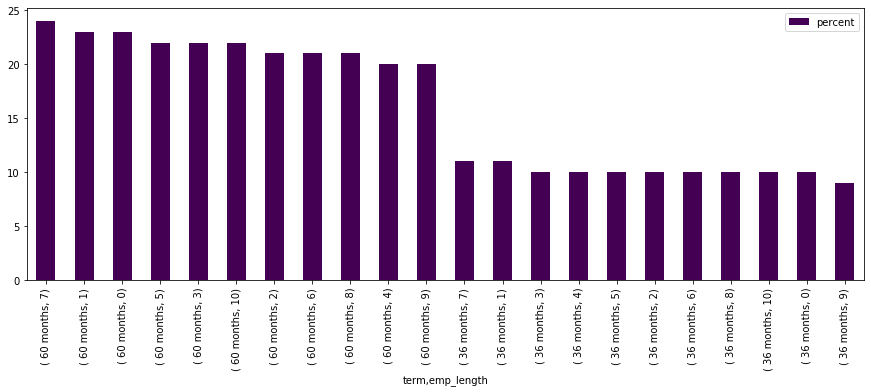

In [160]:
# Grouping wrt Term and experience
grp_exp_term=loan_df_charged_off.groupby(['emp_length','term'],as_index=False).count()[['emp_length','term','id']].rename(columns={'id':'charged_off_loans'})
tgrp_exp_term=loan_df.groupby(['emp_length','term'],as_index=False).count()[['emp_length','term','id']].rename(columns={'id':'total_loans'})
term_exp_plot=pd.merge(grp_exp_term,tgrp_exp_term,how='inner',on=['emp_length','term'])
term_exp_plot['percent']=round(term_exp_plot.charged_off_loans*100/term_exp_plot.total_loans)
term_exp_plot=term_exp_plot.sort_values(by='percent',ascending=False)
print(term_exp_plot)
# Plotting the grouped data
term_exp_plot[['term','emp_length','percent']].set_index(['term','emp_length']).plot(kind='bar',figsize=(15,5),colormap='viridis')

##### Note : Experience does not change the tendency of loan default with respect to term 

### Variables: Public record of bankruptcies and term

   pub_rec_bankruptcies        term  charged_off_loans  total_loans  percent
4                   2.0   36 months                  2            5    40.00
3                   1.0   60 months                157          461    34.06
1                   0.0   60 months               2051         9581    21.41
2                   1.0   36 months                153         1027    14.90
0                   0.0   36 months               2572        25316    10.16


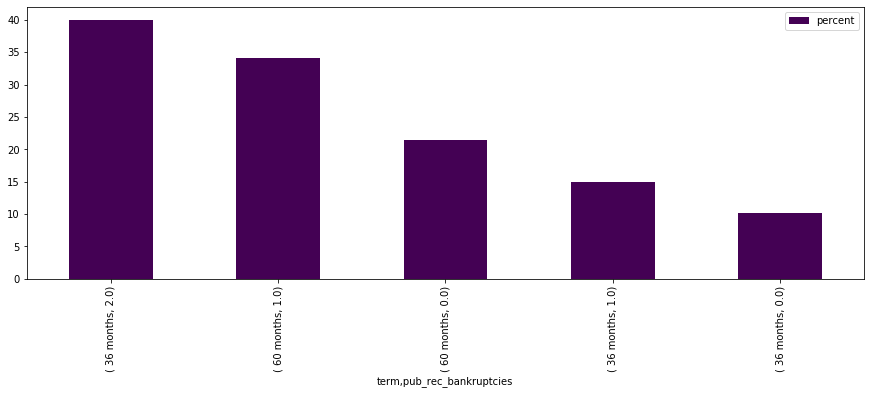

In [161]:
# Grouping data wrt bankruptcy record and loan term
grp_bank_term=loan_df_charged_off.groupby(['pub_rec_bankruptcies','term'],as_index=False).count()[['pub_rec_bankruptcies','term','id']].rename(columns={'id':'charged_off_loans'})
tgrp_bank_term=loan_df.groupby(['pub_rec_bankruptcies','term'],as_index=False).count()[['pub_rec_bankruptcies','term','id']].rename(columns={'id':'total_loans'})
term_bank_plot=pd.merge(grp_bank_term,tgrp_bank_term,how='inner',on=['pub_rec_bankruptcies','term'])
term_bank_plot['percent']=round(term_bank_plot.charged_off_loans*100/term_bank_plot.total_loans,2)
term_bank_plot=term_bank_plot.sort_values(by='percent',ascending=False)
print(term_bank_plot)
# Plotting the data
term_bank_plot[['term','pub_rec_bankruptcies','percent']].set_index(['term','pub_rec_bankruptcies']).plot(kind='bar',figsize=(15,5),colormap='viridis')

##### Note: The tendency of default observed in the univariate analysis of term and public record of bankruptcies tend to remain the same

### Variables : Public record of bankruptcies and employee length

    pub_rec_bankruptcies  emp_length  charged_off_loans  total_loans  percent
23                   2.0           7                  1            1    100.0
22                   2.0           6                  1            1    100.0
14                   1.0           3                 39          131     30.0
11                   1.0           0                 29          108     27.0
16                   1.0           5                 30          116     26.0
15                   1.0           4                 24          108     22.0
21                   1.0          10                107          500     21.0
19                   1.0           8                 13           73     18.0
18                   1.0           7                 14           80     18.0
13                   1.0           2                 22          129     17.0
12                   1.0           1                 13           83     16.0
10                   0.0          10               1122         

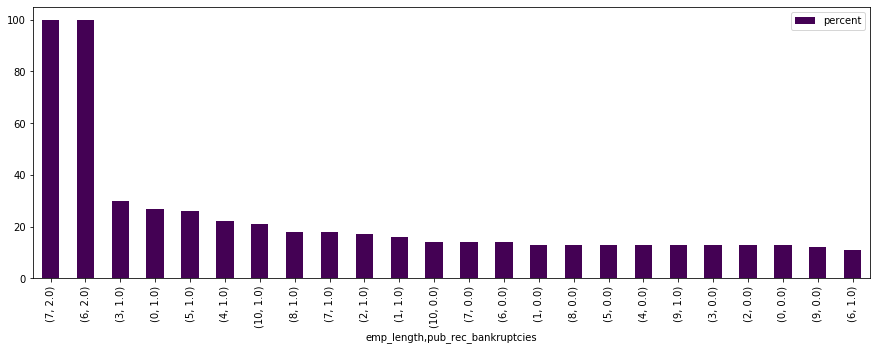

In [162]:
# Grouping data wrt experience and bankruptcy record
grp_bank_exp=loan_df_charged_off.groupby(['pub_rec_bankruptcies','emp_length'],as_index=False).count()[['pub_rec_bankruptcies','emp_length','id']].rename(columns={'id':'charged_off_loans'})
tgrp_bank_exp=loan_df.groupby(['pub_rec_bankruptcies','emp_length'],as_index=False).count()[['pub_rec_bankruptcies','emp_length','id']].rename(columns={'id':'total_loans'})
exp_bank_plot=pd.merge(grp_bank_exp,tgrp_bank_exp,how='inner',on=['pub_rec_bankruptcies','emp_length'])
exp_bank_plot['percent']=round(exp_bank_plot.charged_off_loans*100/exp_bank_plot.total_loans)
exp_bank_plot=exp_bank_plot.sort_values(by='percent',ascending=False)
print(exp_bank_plot)
# Plotting the data
exp_bank_plot[['emp_length','pub_rec_bankruptcies','percent']].set_index(['emp_length','pub_rec_bankruptcies']).plot(kind='bar',figsize=(15,5),colormap='viridis')

##### Note: Experience does not show any significant impact in default tendency of those with no prior record of bankruptcies whereas with a single record of bankruptcy , the experience shows normal distribution pattern as observed in the univariate analysis

### Variables: Grade and Employee length

   grade  emp_length  charged_off_loans  total_loans  percent
67     G           1                 11           16     69.0
64     F           9                  9           20     45.0
69     G           3                 14           37     38.0
62     F           7                 20           53     38.0
56     F           1                 23           69     33.0
65     F          10                 89          270     33.0
76     G          10                 26           80     32.0
70     G           4                  9           30     30.0
59     F           4                 26           88     30.0
66     G           0                 10           34     29.0
71     G           5                  6           21     29.0
60     F           5                 26           90     29.0
51     E           7                 32          114     28.0
57     F           2                 28          105     27.0
72     G           6                  4           15     27.0
52     E

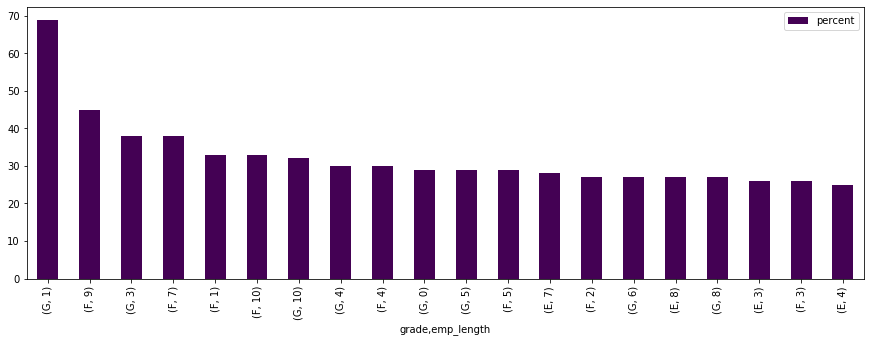

In [163]:
# Grouping data wrt Grade and experience
loan_df_charged_off['grade']=loan_df_charged_off['sub_grade'].apply(lambda x:x[0])
loan_df['grade']=loan_df['sub_grade'].apply(lambda x:x[0])
grp_grade_exp=loan_df_charged_off.groupby(['grade','emp_length'],as_index=False).count()[['grade','emp_length','id']].rename(columns={'id':'charged_off_loans'})
tgrp_grade_exp=loan_df.groupby(['grade','emp_length'],as_index=False).count()[['grade','emp_length','id']].rename(columns={'id':'total_loans'})
exp_grade_plot=pd.merge(grp_grade_exp,tgrp_grade_exp,how='inner',on=['grade','emp_length'])
exp_grade_plot['percent']=round(exp_grade_plot.charged_off_loans*100/exp_grade_plot.total_loans)
print(exp_grade_plot.sort_values(by='percent',ascending=False).head(20))
print(exp_grade_plot.sort_values(by='percent',ascending=False).tail(20))
# PLotting the data
exp_grade_plot[['grade','emp_length','percent']].set_index(['grade','emp_length']).sort_values(by='percent',ascending=False).head(20).plot(kind='bar',figsize=(15,5),colormap='viridis')

##### Note: Lower grades tend to default more irrespective of the employee experience and default tendency is less among higher grades irrespective of the experience

### Variables : Grade and purpose

   grade             purpose  charged_off_loans  total_loans  percent
90     G    renewable_energy                  2            2   100.00
87     G             medical                  2            3    66.67
78     F    renewable_energy                  1            2    50.00
81     G                 car                  1            2    50.00
91     G      small_business                 18           37    48.65
73     F               house                  6           14    42.86
58     E         educational                  5           12    41.67
60     E               house                 12           29    41.38
68     F                 car                  4           10    40.00
89     G               other                  7           18    38.89
66     E            vacation                  7           19    36.84
79     F      small_business                 26           72    36.11
85     G               house                  2            6    33.33
70     F  debt_conso

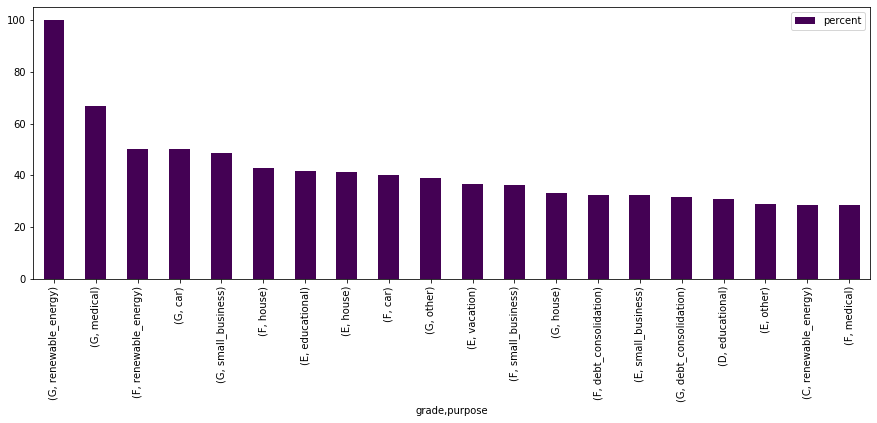

In [164]:
# Grouping wrt Grade and purpose
grp_grade_purp=loan_df_charged_off.groupby(['grade','purpose'],as_index=False).count()[['grade','purpose','id']].rename(columns={'id':'charged_off_loans'})
tgrp_grade_purp=loan_df.groupby(['grade','purpose'],as_index=False).count()[['grade','purpose','id']].rename(columns={'id':'total_loans'})
purp_grade_plot=pd.merge(grp_grade_purp,tgrp_grade_purp,how='inner',on=['grade','purpose'])
purp_grade_plot['percent']=round(purp_grade_plot.charged_off_loans*100/purp_grade_plot.total_loans,2)
print(purp_grade_plot.sort_values(by='percent',ascending=False).head(20))
# Plotting the data
purp_grade_plot[['grade','purpose','percent']].set_index(['grade','purpose']).sort_values(by='percent',ascending=False).head(20).plot(kind='bar',figsize=(15,5),colormap='viridis')

##### Note: Deadly Combinations : Lower Grades and Purposes like renewable energy, small business, debt consolidation,education, house, medical, car

### Variables : State and Term

Top 10 in 36 months:    addr_state        term  charged_off_loans  total_loans  percent
71         TN   36 months                  2           10    20.00
0          AK   36 months                  9           51    17.65
53         NV   36 months                 56          318    17.61
22         HI   36 months                 15          109    13.76
20         GA   36 months                118          906    13.02
18         FL   36 months                250         1922    13.01
69         SD   36 months                  5           39    12.82
51         NM   36 months                 15          120    12.50
43         MT   36 months                  6           49    12.24
40         MO   36 months                 54          445    12.13
Top 10 in 60 months:    addr_state        term  charged_off_loans  total_loans  percent
54         NV   60 months                 41          142    28.87
29         KY   60 months                 28           98    28.57
70         SD   60 m

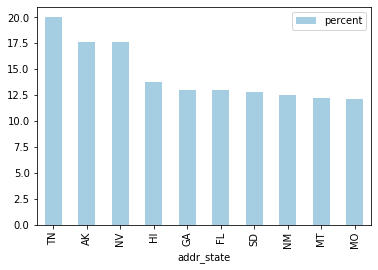

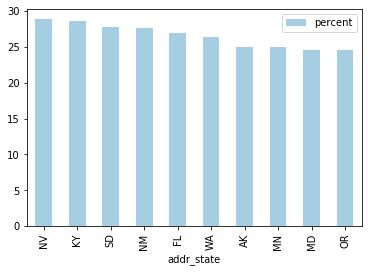

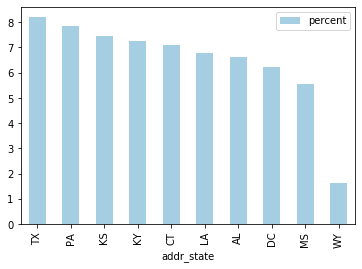

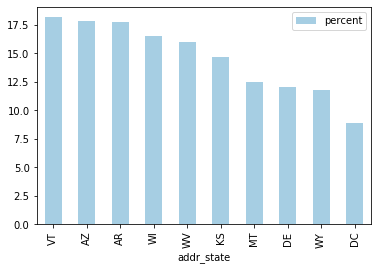

In [165]:
# Grouping wrt state and term
grp_state_term=loan_df_charged_off.groupby(['addr_state','term'],as_index=False).count()[['addr_state','term','id']].rename(columns={'id':'charged_off_loans'})
tgrp_state_term=loan_df.groupby(['addr_state','term'],as_index=False).count()[['addr_state','term','id']].rename(columns={'id':'total_loans'})
term_state_plot=pd.merge(grp_state_term,tgrp_state_term,how='inner',on=['addr_state','term'])
term_state_plot['percent']=round(term_state_plot.charged_off_loans*100/term_state_plot.total_loans,2)
pd.set_option('display.max_rows',90)
term36_state_plot=term_state_plot[term_state_plot.term.apply(lambda x:str(x).strip()=='36 months')]
term60_state_plot=term_state_plot[term_state_plot.term.apply(lambda x:str(x).strip()=='60 months')]
print("Top 10 in 36 months:",term36_state_plot.sort_values(by='percent',ascending=False).head(10))
print("Top 10 in 60 months:",term60_state_plot.sort_values(by='percent',ascending=False).head(10))
print("Least 10 in 36 months:",term36_state_plot.sort_values(by='percent',ascending=False).tail(10))
# Plotting the data
print("Least 10 in 60 months:",term60_state_plot.sort_values(by='percent',ascending=False).tail(10))
term36_state_plot.sort_values(by='percent',ascending=False).head(10)[['addr_state','percent']].set_index('addr_state').plot(kind='bar',colormap='Paired')
term60_state_plot.sort_values(by='percent',ascending=False).head(10)[['addr_state','percent']].set_index('addr_state').plot(kind='bar',colormap='Paired')
term36_state_plot.sort_values(by='percent',ascending=False).tail(10)[['addr_state','percent']].set_index('addr_state').plot(kind='bar',colormap='Paired')
term60_state_plot.sort_values(by='percent',ascending=False).tail(10)[['addr_state','percent']].set_index('addr_state').plot(kind='bar',colormap='Paired')

In [166]:
# Listing the states
top10_states_60=[dict_df_states['Name &postal abbreviation[12]'][x] for x in term60_state_plot.sort_values(by='percent',ascending=False).head(10).addr_state]
top10_states_36=[dict_df_states['Name &postal abbreviation[12]'][x] for x in term36_state_plot.sort_values(by='percent',ascending=False).head(10).addr_state]
least10_states_60=[dict_df_states['Name &postal abbreviation[12]'][x] for x in term60_state_plot.sort_values(by='percent',ascending=False).tail(10).addr_state]
least10_states_36=[dict_df_states['Name &postal abbreviation[12]'][x] for x in term36_state_plot.sort_values(by='percent',ascending=False).tail(10).addr_state]
print("Top 10 states in 60 months term:",top10_states_60)
print("Top 10 states in 36 months term:",top10_states_36)
print("Least 10 states in 60 months term:",least10_states_60)
print("Least 10 states in 36 months term:",least10_states_36)
most_default_states=set(top10_states_60).intersection(set(top10_states_36))
print("Most default states for both terms:",most_default_states)
least_default_states=set(least10_states_60).intersection(set(least10_states_36))
print("Least default states for both terms:",least_default_states)

Top 10 states in 60 months term: ['Nevada', 'Kentucky[E]', 'South Dakota', 'New Mexico', 'Florida', 'Washington', 'Alaska', 'Minnesota', 'Maryland', 'Oregon']
Top 10 states in 36 months term: ['Tennessee', 'Alaska', 'Nevada', 'Hawaii', 'Georgia', 'Florida', 'South Dakota', 'New Mexico', 'Montana', 'Missouri']
Least 10 states in 60 months term: ['Vermont', 'Arizona', 'Arkansas', 'Wisconsin', 'West Virginia', 'Kansas', 'Montana', 'Delaware', 'Wyoming', 'District of Columbia']
Least 10 states in 36 months term: ['Texas', 'Pennsylvania[E]', 'Kansas', 'Kentucky[E]', 'Connecticut', 'Louisiana', 'Alabama', 'District of Columbia', 'Mississippi', 'Wyoming']
Most default states for both terms: {'Florida', 'Nevada', 'Alaska', 'South Dakota', 'New Mexico'}
Least default states for both terms: {'Wyoming', 'Kansas', 'District of Columbia'}


### Variables : Term and Interest rate

    int_rate        term  charged_off_loans  total_loans  percent
37        24   60 months                  2            4    50.00
35        22   60 months                 48          122    39.34
32        21   36 months                  6           16    37.50
30        20   36 months                 16           43    37.21
33        21   60 months                 64          173    36.99
34        22   36 months                  2            6    33.33
36        23   60 months                 13           40    32.50
29        19   60 months                162          550    29.45
31        20   60 months                120          417    28.78
23        16   60 months                269          979    27.48
25        17   60 months                253          942    26.86
27        18   60 months                173          681    25.40
28        19   36 months                 28          121    23.14
21        15   60 months                218          994    21.93
26        

Text(0.5, 1.0, 'Fully Paid Loans')

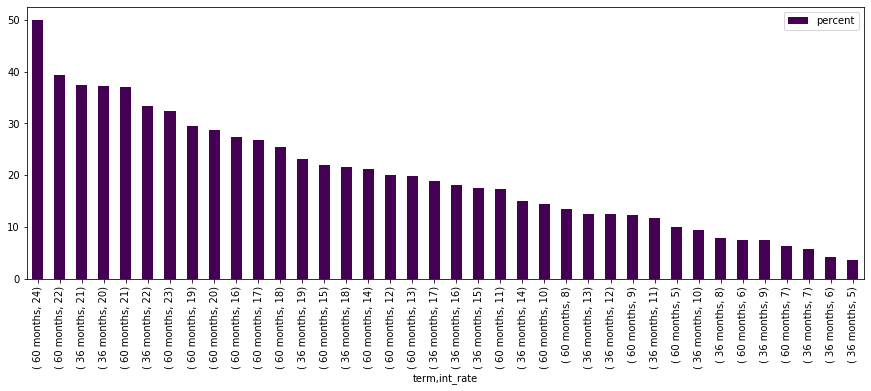

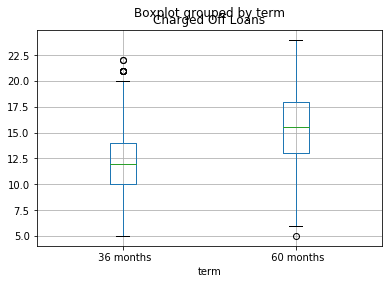

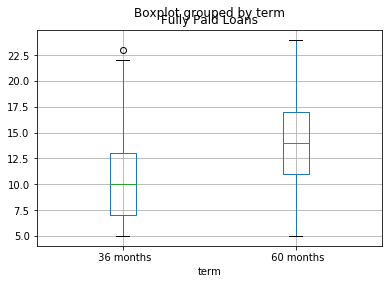

In [167]:
# Grouping data wrt bankruptcy record and loan term
grp_roi_term=loan_df_charged_off.groupby(['int_rate','term'],as_index=False).count()[['int_rate','term','id']].rename(columns={'id':'charged_off_loans'})
tgrp_roi_term=loan_df.groupby(['int_rate','term'],as_index=False).count()[['int_rate','term','id']].rename(columns={'id':'total_loans'})
term_roi_plot=pd.merge(grp_roi_term,tgrp_roi_term,how='inner',on=['int_rate','term'])
term_roi_plot['percent']=round(term_roi_plot.charged_off_loans*100/term_roi_plot.total_loans,2)
term_roi_plot=term_roi_plot.sort_values(by='percent',ascending=False)[term_roi_plot.percent<=100.0]
print(term_roi_plot)
# Plotting the data
term_roi_plot[['term','int_rate','percent']].set_index(['term','int_rate']).plot(kind='bar',figsize=(15,5),colormap='viridis')
loan_df_charged_off.boxplot(column='int_rate',by='term')
plt.title('Charged Off Loans')
loan_df[loan_df.loan_status=='Fully Paid'].boxplot(column='int_rate',by='term')
plt.title('Fully Paid Loans')

##### Note: Interest Rates are more for the term 60 months. Fully paid loans have comparitively lesser interest rates than charged off loans. SO, higher the interest rates, higher the default risk especially in a longer term

## Multivariate Analysis

### Variables : Loan Amount, Loan Status, Verification Status

<function matplotlib.pyplot.show(*args, **kw)>

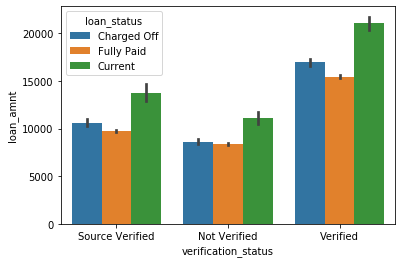

In [168]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_df, estimator=np.mean)
plt.show

##### Note: Higher loan amounts are verified frequently yet more defaults occur amongst the same

### Variables : Loan Amount, Grade, Term

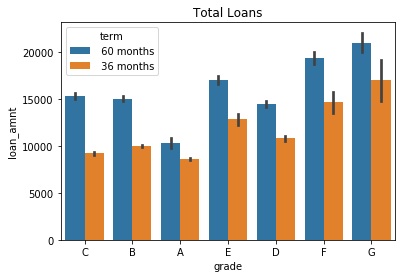

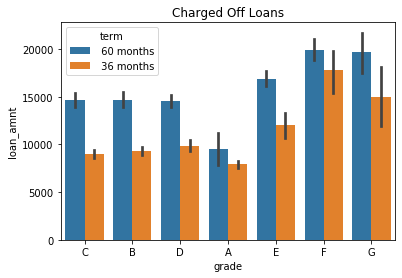

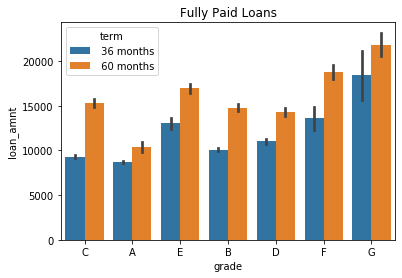

In [169]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan_df, estimator=np.mean)
plt.title('Total Loans')
plt.show()
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan_df_charged_off, estimator=np.mean)
plt.title('Charged Off Loans')
plt.show()
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan_df[loan_df.loan_status=='Fully Paid'], estimator=np.mean)
plt.title('Fully Paid Loans')
plt.show()

##### Note: Larger loan amounts are given to lower grades and higher terms. As loan amount increases, default risk increases for both the terms but only among lower grades. Default rates among Higher grades is unaffected by the loan amount 

### Variables : DTI, Number of open accounts, Loan status

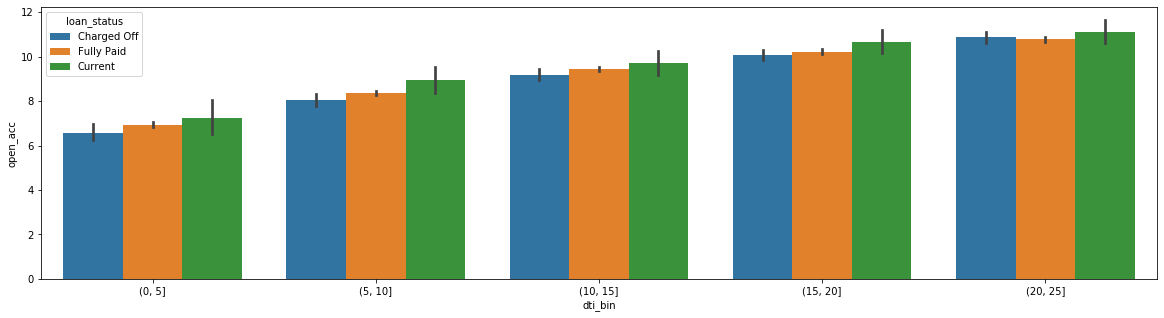

In [170]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=loan_df, estimator=np.mean)
plt.show()

##### Note: DTI increases as number of open account credits inccreases invariably among all the loan statuses

### Variables : Delinquished status within 2 yrs, interest rate , loan status

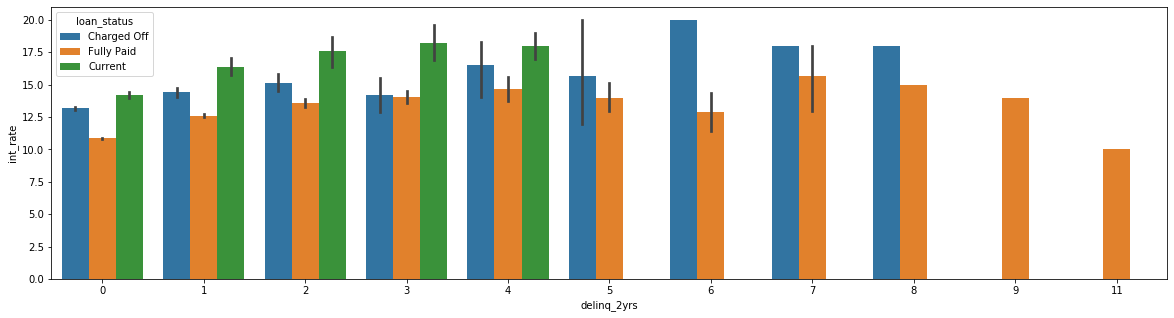

In [171]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=loan_df, estimator=np.mean)
plt.show()

##### Note: Interest rate increases for frequent delinquisment.. HIgher interest rates are prone to defaults. So, frequent delinquishment is also risky

## Finding Correlation

In [172]:
corr=loan_df.corr()
corr['loan_amnt']

id                         0.144790
member_id                  0.144634
loan_amnt                  1.000000
int_rate                   0.304799
installment                0.928902
emp_length                 0.150497
annual_inc                 0.260788
dti                        0.067083
delinq_2yrs               -0.034837
inq_last_6mths             0.006735
mths_since_last_delinq     0.001047
open_acc                   0.173655
pub_rec                   -0.047927
revol_bal                  0.322681
revol_util                 0.069343
total_acc                  0.255551
out_prncp                  0.193371
total_pymnt                0.888803
total_rec_prncp            0.854823
total_rec_int              0.730255
total_rec_late_fee         0.044633
recoveries                 0.135734
collection_recovery_fee    0.074664
last_pymnt_amnt            0.451059
pub_rec_bankruptcies      -0.031265
profit                     0.144836
issue_year                 0.129733
issue_month                0

In [173]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'loan_amnt_bin', 'profit',
       'grade', 'issue_year', 'issue_month', 'annual_inc_bin', 'dti_bin',
       'months_range', 'revol_util_bin'],
      dtype='object')

(12.0, 0.0)

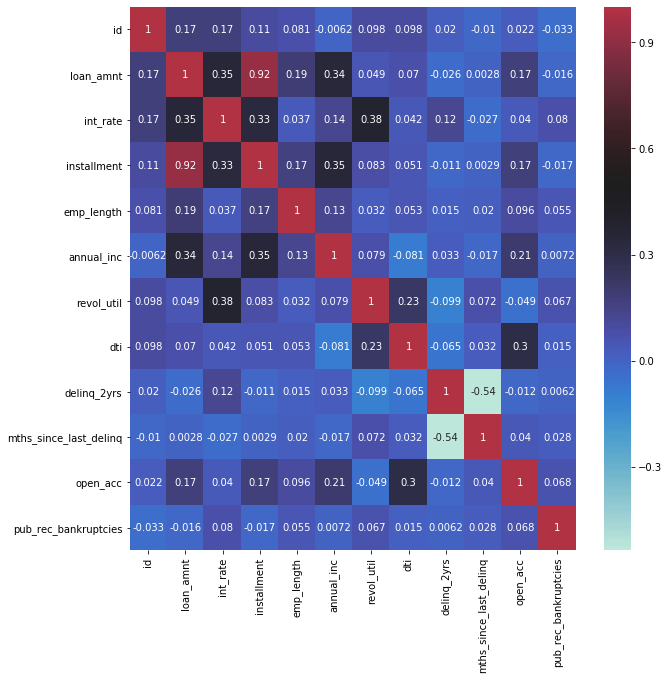

In [174]:
plt.figure(figsize=(10,10))
cols=['id','loan_amnt','term', 'int_rate', 'installment',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status','loan_status', 'purpose', 'revol_util',
       'addr_state', 'dti', 'delinq_2yrs','mths_since_last_delinq', 'open_acc','pub_rec_bankruptcies']
corr = loan_df_charged_off[cols].corr()
ax=sns.heatmap(corr, annot=True, center=0.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

##### Note: Correlation is found among the variables like revolving utility & interest rate , dti & open accounts , installment, loan amount and annual income. 
##### No correlation exist among the variables like months since last delinquency & delinquished status  within 2 yrs